# Credit EDA Case Study DSC 27

## Introduction:
 This case study aims to gives an idea of applying EDA in a real business scenario. In this case study, apart from applying the techniques that you have learnt in the EDA module, you will also develop a basic understanding of risk analytics in banking and financial services and understand how data is used to minimise the risk of losing money while lending to customers.

## Objective: 

1) Identify patterns which indicate if a client is has payment difficulties.
2) Understand how customer attributes and past loan attributes influence the tendency of default among the applicants

## Outcome:

These insights can be used for taking appropriate actions such as denying loan, increasing interest rate etc. Which will ensure that the applicants capable of repaying the loan are not rejected.


## Step 1: Data Cleaning

### Load CSV files into Python

In [1]:
# Filtering out the warnings

import warnings

warnings.filterwarnings('ignore')


In [2]:
# Importing the required libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import plotly.graph_objects as go
pd.set_option('display.max_columns', 300) #Setting column display limit
#plt.style.use('ggplot') #Applying style to graphs


In [3]:
apps_data=pd.read_csv('application_data.csv')
prevs_data=pd.read_csv('previous_application.csv')

 ### Inspecting Application Data

In [4]:
apps_data.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   SK_ID_CURR                    int64  
 1   TARGET                        int64  
 2   NAME_CONTRACT_TYPE            object 
 3   CODE_GENDER                   object 
 4   FLAG_OWN_CAR                  object 
 5   FLAG_OWN_REALTY               object 
 6   CNT_CHILDREN                  int64  
 7   AMT_INCOME_TOTAL              float64
 8   AMT_CREDIT                    float64
 9   AMT_ANNUITY                   float64
 10  AMT_GOODS_PRICE               float64
 11  NAME_TYPE_SUITE               object 
 12  NAME_INCOME_TYPE              object 
 13  NAME_EDUCATION_TYPE           object 
 14  NAME_FAMILY_STATUS            object 
 15  NAME_HOUSING_TYPE             object 
 16  REGION_POPULATION_RELATIVE    float64
 17  DAYS_BIRTH                    int64  
 18  DAYS_EMPLOYED          

In [5]:
apps_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

### Removing all those columns who have a missing percentage greater than 50%

#### It is clear from the data dictionary that there are no Missing Column Names and Inconsistent column names.Now we will check for any columns which are irrelevant to out analysis and drop them

In [6]:
missing_cols_data = (apps_data.isnull().sum()/len(apps_data)*100).sort_values(ascending = False)


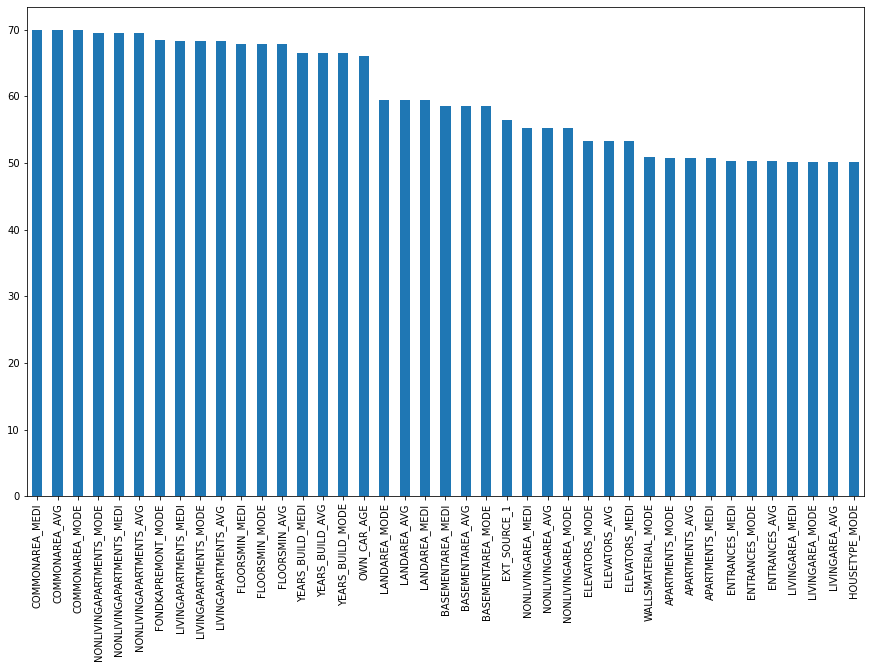

In [7]:
plt.figure(figsize=[15,9])
missing_cols_data[missing_cols_data>50].plot.bar()
plt.show()

In [8]:
type(missing_cols_data)

pandas.core.series.Series

In [9]:
missing_cols_data.head()

COMMONAREA_MEDI             69.872297
COMMONAREA_AVG              69.872297
COMMONAREA_MODE             69.872297
NONLIVINGAPARTMENTS_MODE    69.432963
NONLIVINGAPARTMENTS_MEDI    69.432963
dtype: float64

In [10]:
to_drop = list(missing_cols_data[missing_cols_data >50].index)

In [11]:
apps_data1 = apps_data.drop(to_drop,axis=1)
print(apps_data1.shape)

(307511, 81)


In [12]:
apps_data1 = apps_data1.set_index("SK_ID_CURR")

###  We've checked for inconsistencies in the header row and any potential summary rows in the dataframe and didnt find any. Now we will check the dataframe for any duplicate or blank rows.

In [13]:
apps_data1.drop_duplicates(keep=False,inplace=True)

In [14]:
apps_data1.shape

(307511, 80)

In [15]:
apps_data1['missing_data']=apps_data1.isnull().sum(axis=1)

In [16]:
apps_data1['missing_data'].describe()

count    307511.000000
mean          5.255311
std           4.701534
min           0.000000
25%           0.000000
50%           8.000000
75%           8.000000
max          20.000000
Name: missing_data, dtype: float64

### From the above table, we can observe that the maximum missing value in a row is 12 which is well within our tolerance for missing values in a row. 

In [17]:
apps_data1.describe()

TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL    AMT_CREDIT  \
count  307511.000000  307511.000000      3.075110e+05  3.075110e+05   
mean        0.080729       0.417052      1.687979e+05  5.990260e+05   
std         0.272419       0.722121      2.371231e+05  4.024908e+05   
min         0.000000       0.000000      2.565000e+04  4.500000e+04   
25%         0.000000       0.000000      1.125000e+05  2.700000e+05   
50%         0.000000       0.000000      1.471500e+05  5.135310e+05   
75%         0.000000       1.000000      2.025000e+05  8.086500e+05   
max         1.000000      19.000000      1.170000e+08  4.050000e+06   

         AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  \
count  307499.000000     3.072330e+05               307511.000000   
mean    27108.573909     5.383962e+05                    0.020868   
std     14493.737315     3.694465e+05                    0.013831   
min      1615.500000     4.050000e+04                    0.000290   
25%     16524.000000     2.385000e+05                    0.010006   
50%     24903.000000     4.500000e+05                    0.018850   
75%     34596.000000     6.795000e+05                    0.028663   
max    258025.500000     4.050000e+06                    0.072508   

          DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
count  307511.000000  307511.000000      307511.000000    307511.000000   
mean   -16036.995067   63815.045904       -4986.120328     -2994.202373   
std      4363.988632  141275.766519        3522.886321      1509.450419   
min    -25229.000000  -17912.000000      -24672.000000     -7197.000000   
25%    -19682.000000   -2760.000000       -7479.500000     -4299.000000   
50%    -15750.000000   -1213.000000       -4504.000000     -3254.000000   
75%    -12413.000000    -289.000000       -2010.000000     -1720.000000   
max     -7489.000000  365243.000000           0.000000         0.000000   

          FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  \
count  307511.000000   307511.000000    307511.000000     307511.000000   
mean        0.999997        0.819889         0.199368          0.998133   
std         0.001803        0.384280         0.399526          0.043164   
min         0.000000        0.000000         0.000000          0.000000   
25%         1.000000        1.000000         0.000000          1.000000   
50%         1.000000        1.000000         0.000000          1.000000   
75%         1.000000        1.000000         0.000000          1.000000   
max         1.000000        1.000000         1.000000          1.000000   

          FLAG_PHONE     FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
count  307511.000000  307511.000000    307509.000000         307511.000000   
mean        0.281066       0.056720         2.152665              2.052463   
std         0.449521       0.231307         0.910682              0.509034   
min         0.000000       0.000000         1.000000              1.000000   
25%         0.000000       0.000000         2.000000              2.000000   
50%         0.000000       0.000000         2.000000              2.000000   
75%         1.000000       0.000000         3.000000              2.000000   
max         1.000000       1.000000        20.000000              3.000000   

       REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
count                307511.000000            307511.000000   
mean                      2.031521                12.063419   
std                       0.502737                 3.265832   
min                       1.000000                 0.000000   
25%                       2.000000                10.000000   
50%                       2.000000                12.000000   
75%                       2.000000                14.000000   
max                       3.000000                23.000000   

       REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
count               307511.000000               307511.000000   

In [18]:
#  code gender=xna
# name type suite= other a,b and blanks
# days employed 365243
# occupation type= blanks
# organisation type=xna


### There are few values in the columns like Code_gender and Organization_Type which should be treated as missing (These values are given as XNA).Now, we have to convert these values into Nan to impute these values in at later stages.

In [19]:
apps_data1[apps_data1=="XNA"]=np.nan

### In the column days employed, there is an extreme value 365243 used to indicate the missing value. We will replace this value with Nan

In [20]:
apps_data1["DAYS_EMPLOYED"][apps_data1["DAYS_EMPLOYED"]==365243] = np.nan
apps_data1.head(10)

TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
SK_ID_CURR                                                       
100002           1         Cash loans           M            N   
100003           0         Cash loans           F            N   
100004           0    Revolving loans           M            Y   
100006           0         Cash loans           F            N   
100007           0         Cash loans           M            N   
100008           0         Cash loans           M            N   
100009           0         Cash loans           F            Y   
100010           0         Cash loans           M            Y   
100011           0         Cash loans           F            N   
100012           0    Revolving loans           M            N   

           FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
SK_ID_CURR                                                               
100002                   Y             0          202500.0    406597.5   
100003                   N             0          270000.0   1293502.5   
100004                   Y             0           67500.0    135000.0   
100006                   Y             0          135000.0    312682.5   
100007                   Y             0          121500.0    513000.0   
100008                   Y             0           99000.0    490495.5   
100009                   Y             1          171000.0   1560726.0   
100010                   Y             0          360000.0   1530000.0   
100011                   Y             0          112500.0   1019610.0   
100012                   Y             0          135000.0    405000.0   

            AMT_ANNUITY  AMT_GOODS_PRICE  NAME_TYPE_SUITE  \
SK_ID_CURR                                                  
100002          24700.5         351000.0    Unaccompanied   
100003          35698.5        1129500.0           Family   
100004           6750.0         135000.0    Unaccompanied   
100006          29686.5         297000.0    Unaccompanied   
100007          21865.5         513000.0    Unaccompanied   
100008          27517.5         454500.0  Spouse, partner   
100009          41301.0        1395000.0    Unaccompanied   
100010          42075.0        1530000.0    Unaccompanied   
100011          33826.5         913500.0         Children   
100012          20250.0         405000.0    Unaccompanied   

                NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
SK_ID_CURR                                                        
100002                   Working  Secondary / secondary special   
100003             State servant               Higher education   
100004                   Working  Secondary / secondary special   
100006                   Working  Secondary / secondary special   
100007                   Working  Secondary / secondary special   
100008             State servant  Secondary / secondary special   
100009      Commercial associate               Higher education   
100010             State servant               Higher education   
100011                 Pensioner  Secondary / secondary special   
100012                   Working  Secondary / secondary special   

              NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
SK_ID_CURR                                            
100002      Single / not married  House / apartment   
100003                   Married  House / apartment   
100004      Single / not married  House / apartment   
100006            Civil marriage  House / apartment   
100007      Single / not married  House / apartment   
100008                   Married  House / apartment   
100009                   Married  House / apartment   
100010                   Married  House / apartment   
100011                   Married  House / apartment   
100012      Single / not married  House / apartment   

            REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
SK_ID_CURR                                                    

In [21]:
apps_data1.to_csv("apps_data_after_droppin1.csv")

In [22]:
print(apps_data1.shape)
apps_data1.drop("missing_data", axis =1, inplace=True)
print(apps_data1.shape)

(307511, 81)
(307511, 80)


In [23]:
missing_cols_data2 = (apps_data1.isnull().sum()/len(apps_data1)*100).sort_values(ascending = False)
print(missing_cols_data2[missing_cols_data2>0])                                

FLOORSMAX_MEDI                  49.760822
FLOORSMAX_MODE                  49.760822
FLOORSMAX_AVG                   49.760822
YEARS_BEGINEXPLUATATION_AVG     48.781019
YEARS_BEGINEXPLUATATION_MEDI    48.781019
YEARS_BEGINEXPLUATATION_MODE    48.781019
TOTALAREA_MODE                  48.268517
EMERGENCYSTATE_MODE             47.398304
OCCUPATION_TYPE                 31.345545
EXT_SOURCE_3                    19.825307
DAYS_EMPLOYED                   18.007161
ORGANIZATION_TYPE               18.007161
AMT_REQ_CREDIT_BUREAU_YEAR      13.501631
AMT_REQ_CREDIT_BUREAU_QRT       13.501631
AMT_REQ_CREDIT_BUREAU_HOUR      13.501631
AMT_REQ_CREDIT_BUREAU_DAY       13.501631
AMT_REQ_CREDIT_BUREAU_WEEK      13.501631
AMT_REQ_CREDIT_BUREAU_MON       13.501631
NAME_TYPE_SUITE                  0.420148
DEF_60_CNT_SOCIAL_CIRCLE         0.332021
OBS_30_CNT_SOCIAL_CIRCLE         0.332021
DEF_30_CNT_SOCIAL_CIRCLE         0.332021
OBS_60_CNT_SOCIAL_CIRCLE         0.332021
EXT_SOURCE_2                     0

In [24]:
apps_data1["missing_values_in_row"] = apps_data1.isna().sum(axis=1)
apps_data1["missing_values_in_row"].value_counts()

0     84573
8     81720
1     24317
3     24012
11    21628
9     21486
15    14480
7     14455
10     5702
18     3797
4      2970
16     2855
12     1877
2      1570
6      1146
14      295
13      284
5       191
17       77
19       54
20       12
22       10
Name: missing_values_in_row, dtype: int64

In [25]:
# Replace np.nan in occupation type with a new category called missing
apps_data1["OCCUPATION_TYPE"][apps_data1["OCCUPATION_TYPE"].isna()] = "Missing"

apps_data1["OCCUPATION_TYPE"].value_counts()

Missing                  96391
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

In [26]:
apps_data1.ORGANIZATION_TYPE.value_counts().head()

Business Entity Type 3    67992
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Name: ORGANIZATION_TYPE, dtype: int64

In [27]:
(18*307511)/100 #missing value percentage in organization type

55351.98

- Let's see if the value is `Missing Completely At Random(MCAR)`,`Missing At Random(MAR)`,`Missing Not At Random(MNAR)`

In [28]:
apps_data1[['ORGANIZATION_TYPE','NAME_INCOME_TYPE']].head(30)

ORGANIZATION_TYPE      NAME_INCOME_TYPE
SK_ID_CURR                                              
100002      Business Entity Type 3               Working
100003                      School         State servant
100004                  Government               Working
100006      Business Entity Type 3               Working
100007                    Religion               Working
100008                       Other         State servant
100009      Business Entity Type 3  Commercial associate
100010                       Other         State servant
100011                         NaN             Pensioner
100012                 Electricity               Working
100014                    Medicine               Working
100015                         NaN             Pensioner
100016      Business Entity Type 2               Working
100017               Self-employed               Working
100018           Transport: type 2               Working
100019      Business Entity Type 2               Working
100020                  Government               Working
100021                Construction               Working
100022                     Housing               Working
100023                Kindergarten         State servant
100024               Self-employed               Working
100025               Trade: type 7  Commercial associate
100026               Self-employed               Working
100027                         NaN             Pensioner
100029      Business Entity Type 3               Working
100030      Business Entity Type 3               Working
100031      Business Entity Type 3               Working
100032           Industry: type 11               Working
100033                    Military         State servant
100034      Business Entity Type 3               Working

In [29]:
apps_data1.NAME_INCOME_TYPE.value_counts()    #Check the counts for each in NAME_INCOME_TYPE

Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64

- So from these data we can conclude that, Pensioner value is approximately equal to null values in `ORGANIZATION_TYPE` column.So the value is `Missing At Random`


- Similarly imputing null values of `OCCUPATION_TYPE` with ___Pensioner___ as most of the null values for OCCUPATION_TYPE compare to Income type variable values we found that "___Pensioner___" is most frequent value almost 80% of teh null values of OCCUPATION_TYPE

In [30]:
# Replace np.nan in ORGANIZATION_TYPE with a new category called missing
apps_data1["ORGANIZATION_TYPE"][apps_data1["ORGANIZATION_TYPE"].isna()] = "Pensioner"

apps_data1["ORGANIZATION_TYPE"].value_counts()

Business Entity Type 3    67992
Pensioner                 55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

### Imputing Columns having null values with Mode values for numeric columns except for continuous numeric columns we imputed with Median value

In [31]:
apps_data1.EXT_SOURCE_3.fillna(apps_data1.EXT_SOURCE_3.median() , inplace = True) #EXT_SOURCE_3

apps_data1.DAYS_EMPLOYED.fillna(apps_data1.DAYS_EMPLOYED.median() , inplace = True) #DAYS_EMPLOYED

apps_data1.AMT_REQ_CREDIT_BUREAU_YEAR.fillna(apps_data1.AMT_REQ_CREDIT_BUREAU_YEAR.mode()[0],inplace = True) #AMT_REQ_CREDIT_BUREAU_YEAR

apps_data1.AMT_REQ_CREDIT_BUREAU_MON.fillna(apps_data1.AMT_REQ_CREDIT_BUREAU_MON.mode()[0],inplace = True)   #AMT_REQ_CREDIT_BUREAU_MON  

apps_data1.AMT_REQ_CREDIT_BUREAU_WEEK.fillna(apps_data1.AMT_REQ_CREDIT_BUREAU_WEEK.mode()[0],inplace = True) #AMT_REQ_CREDIT_BUREAU_WEEK

apps_data1.AMT_REQ_CREDIT_BUREAU_DAY.fillna(apps_data1.AMT_REQ_CREDIT_BUREAU_DAY.mode()[0],inplace = True)   #AMT_REQ_CREDIT_BUREAU_DAY

apps_data1.AMT_REQ_CREDIT_BUREAU_HOUR.fillna(apps_data1.AMT_REQ_CREDIT_BUREAU_HOUR.mode()[0],inplace = True) #AMT_REQ_CREDIT_BUREAU_HOUR

apps_data1.AMT_REQ_CREDIT_BUREAU_QRT.fillna(apps_data1.AMT_REQ_CREDIT_BUREAU_QRT.mode()[0],inplace = True)   #AMT_REQ_CREDIT_BUREAU_QRT

apps_data1.NAME_TYPE_SUITE.fillna(apps_data1.NAME_TYPE_SUITE.mode()[0],inplace = True) #NAME_TYPE_SUITE

apps_data1.OBS_30_CNT_SOCIAL_CIRCLE.fillna( apps_data1.OBS_30_CNT_SOCIAL_CIRCLE.mode()[0],inplace = True) #OBS_30_CNT_SOCIAL_CIRCLE

apps_data1.DEF_30_CNT_SOCIAL_CIRCLE.fillna( apps_data1.DEF_30_CNT_SOCIAL_CIRCLE.mode()[0],inplace = True) #DEF_30_CNT_SOCIAL_CIRCLE

apps_data1.OBS_60_CNT_SOCIAL_CIRCLE.fillna( apps_data1.OBS_60_CNT_SOCIAL_CIRCLE.mode()[0],inplace = True) #OBS_60_CNT_SOCIAL_CIRCLE

apps_data1.DEF_60_CNT_SOCIAL_CIRCLE.fillna( apps_data1.DEF_60_CNT_SOCIAL_CIRCLE.mode()[0],inplace = True) #DEF_60_CNT_SOCIAL_CIRCLE

apps_data1.EXT_SOURCE_2.fillna(apps_data1.EXT_SOURCE_2.median() , inplace = True) #EXT_SOURCE_2

apps_data1.CNT_FAM_MEMBERS.fillna(apps_data1.CNT_FAM_MEMBERS.mode()[0] , inplace = True) #CNT_FAM_MEMBERS

apps_data1.DAYS_LAST_PHONE_CHANGE.fillna(apps_data1.DAYS_LAST_PHONE_CHANGE.mode()[0],inplace = True) #DAYS_LAST_PHONE_CHANGE

apps_data1.CODE_GENDER.fillna(apps_data1.CODE_GENDER.mode()[0],inplace = True) #CODE_GENDER

apps_data1.AMT_ANNUITY.fillna(apps_data1.AMT_ANNUITY.median(),inplace = True) #AMT_ANNUITY

apps_data1.AMT_GOODS_PRICE.fillna(apps_data1.AMT_GOODS_PRICE.median(),inplace = True) #AMT_ANNUITY




In [32]:
# print(apps_data1.CODE_GENDER.mode())
# print(apps_data1.CODE_GENDER.mode()[0])
# print(apps_data1.AMT_GOODS_PRICE.median())

In [33]:
apps_data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307511 entries, 100002 to 456255
Data columns (total 81 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   TARGET                        307511 non-null  int64  
 1   NAME_CONTRACT_TYPE            307511 non-null  object 
 2   CODE_GENDER                   307511 non-null  object 
 3   FLAG_OWN_CAR                  307511 non-null  object 
 4   FLAG_OWN_REALTY               307511 non-null  object 
 5   CNT_CHILDREN                  307511 non-null  int64  
 6   AMT_INCOME_TOTAL              307511 non-null  float64
 7   AMT_CREDIT                    307511 non-null  float64
 8   AMT_ANNUITY                   307511 non-null  float64
 9   AMT_GOODS_PRICE               307511 non-null  float64
 10  NAME_TYPE_SUITE               307511 non-null  object 
 11  NAME_INCOME_TYPE              307511 non-null  object 
 12  NAME_EDUCATION_TYPE           307511 no

In [34]:
apps_data1.drop(["missing_values_in_row", "WEEKDAY_APPR_PROCESS_START","HOUR_APPR_PROCESS_START"],axis=1,inplace=True)
print(apps_data1.shape)

(307511, 78)


### Converting negative day values to positive

In [35]:
apps_data1[['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','DAYS_LAST_PHONE_CHANGE']] = abs(apps_data1[['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','DAYS_LAST_PHONE_CHANGE']])

### Changing "Y" and "N" with 1 and 0 for columns

In [36]:
apps_data1['FLAG_OWN_CAR'] = np.where(apps_data1['FLAG_OWN_CAR']=='Y', 1 , 0)

apps_data1['FLAG_OWN_REALTY'] = np.where(apps_data1['FLAG_OWN_REALTY']=='Y', 1 , 0)

### Converting days to years/months in columns realted to days

In [37]:
day_cols = ['DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','DAYS_LAST_PHONE_CHANGE']

apps_data1[day_cols]= (apps_data1[day_cols]/30).astype(int)
apps_data1['DAYS_BIRTH']= (apps_data1['DAYS_BIRTH']/365).astype(int)

In [38]:
apps_data1['AGE_GROUP']=pd.cut(apps_data1['DAYS_BIRTH'],                 
                         bins=[18,25,35,60,100], labels=['18_to_25','25_to_35', '35_to_60', 'Above 60'])   #Binning

### Creating new columns

In [39]:
apps_data1['AMT_INCOME_GROUP'] = pd.qcut(apps_data1.AMT_INCOME_TOTAL, q=[0, 0.2, 0.5, 0.8, 0.95, 1], labels=['VERY_LOW_GROUP', 'LOW_GROUP', "MEDIUM_GROUP", 'HIGH_GROUP', 'VERY_HIGH_GROUP'])
apps_data1['AMT_CREDIT_GROUP'] = pd.qcut(apps_data1.AMT_CREDIT, q=[0, 0.2, 0.5, 0.8, 0.95, 1], labels=['VERY_LOW_GROUP', 'LOW_GROUP', "MEDIUM_GROUP", 'HIGH_GROUP', 'VERY_HIGH_GROUP'])


In [40]:
apps_data1['FLAG_OWN_CAR_REALTY'] = apps_data1['FLAG_OWN_CAR']*apps_data1['FLAG_OWN_REALTY']

apps_data1['TOTAL_PHN_NOS'] = apps_data1[['FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE','FLAG_PHONE']].sum(axis=1)

flag_doc_cols = [i for i in apps_data1 if i.startswith('FLAG_DOCUMENT')]

apps_data1['TOTAL_DOCUMENTS'] = apps_data1[flag_doc_cols].sum(axis=1)

In [41]:
apps_data1.head()

TARGET NAME_CONTRACT_TYPE CODE_GENDER  FLAG_OWN_CAR  \
SK_ID_CURR                                                        
100002           1         Cash loans           M             0   
100003           0         Cash loans           F             0   
100004           0    Revolving loans           M             1   
100006           0         Cash loans           F             0   
100007           0         Cash loans           M             0   

            FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
SK_ID_CURR                                                                
100002                    1             0          202500.0    406597.5   
100003                    0             0          270000.0   1293502.5   
100004                    1             0           67500.0    135000.0   
100006                    1             0          135000.0    312682.5   
100007                    1             0          121500.0    513000.0   

            AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
SK_ID_CURR                                                                  
100002          24700.5         351000.0   Unaccompanied          Working   
100003          35698.5        1129500.0          Family    State servant   
100004           6750.0         135000.0   Unaccompanied          Working   
100006          29686.5         297000.0   Unaccompanied          Working   
100007          21865.5         513000.0   Unaccompanied          Working   

                      NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
SK_ID_CURR                                                        
100002      Secondary / secondary special  Single / not married   
100003                   Higher education               Married   
100004      Secondary / secondary special  Single / not married   
100006      Secondary / secondary special        Civil marriage   
100007      Secondary / secondary special  Single / not married   

            NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
SK_ID_CURR                                                              
100002      House / apartment                    0.018801          25   
100003      House / apartment                    0.003541          45   
100004      House / apartment                    0.010032          52   
100006      House / apartment                    0.008019          52   
100007      House / apartment                    0.028663          54   

            DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  \
SK_ID_CURR                                                                  
100002                 21                121               70           1   
100003                 39                 39                9           1   
100004                  7                142               84           1   
100006                101                327               81           1   
100007                101                143              115           1   

            FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  \
SK_ID_CURR                                                                  
100002                   1                0                 1           1   
100003                   1                0                 1           1   
100004                   1                1                 1           1   
100006                   1                0                 1           0   
100007                   1                0                 1           0   

            FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
SK_ID_CURR                                                                      
100002               0        Laborers              1.0                     2   
100003               0      Core staff              2.0                     1   
100004               0        Laborers              1.0                     2   
100006   

In [42]:
apps_data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307511 entries, 100002 to 456255
Data columns (total 84 columns):
 #   Column                        Non-Null Count   Dtype   
---  ------                        --------------   -----   
 0   TARGET                        307511 non-null  int64   
 1   NAME_CONTRACT_TYPE            307511 non-null  object  
 2   CODE_GENDER                   307511 non-null  object  
 3   FLAG_OWN_CAR                  307511 non-null  int32   
 4   FLAG_OWN_REALTY               307511 non-null  int32   
 5   CNT_CHILDREN                  307511 non-null  int64   
 6   AMT_INCOME_TOTAL              307511 non-null  float64 
 7   AMT_CREDIT                    307511 non-null  float64 
 8   AMT_ANNUITY                   307511 non-null  float64 
 9   AMT_GOODS_PRICE               307511 non-null  float64 
 10  NAME_TYPE_SUITE               307511 non-null  object  
 11  NAME_INCOME_TYPE              307511 non-null  object  
 12  NAME_EDUCATION_TYPE      

# Analysis

### Datatypes corrected

In [43]:
cols_to_convert_to_int = ['CNT_FAM_MEMBERS','OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE']

apps_data1[cols_to_convert_to_int]=apps_data1[cols_to_convert_to_int].astype(int)

In [44]:
apps_data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307511 entries, 100002 to 456255
Data columns (total 84 columns):
 #   Column                        Non-Null Count   Dtype   
---  ------                        --------------   -----   
 0   TARGET                        307511 non-null  int64   
 1   NAME_CONTRACT_TYPE            307511 non-null  object  
 2   CODE_GENDER                   307511 non-null  object  
 3   FLAG_OWN_CAR                  307511 non-null  int32   
 4   FLAG_OWN_REALTY               307511 non-null  int32   
 5   CNT_CHILDREN                  307511 non-null  int64   
 6   AMT_INCOME_TOTAL              307511 non-null  float64 
 7   AMT_CREDIT                    307511 non-null  float64 
 8   AMT_ANNUITY                   307511 non-null  float64 
 9   AMT_GOODS_PRICE               307511 non-null  float64 
 10  NAME_TYPE_SUITE               307511 non-null  object  
 11  NAME_INCOME_TYPE              307511 non-null  object  
 12  NAME_EDUCATION_TYPE      

In [45]:
cols_to_convert_to_category = apps_data1.select_dtypes(exclude=['int32','int64','float64']).columns.to_list()
apps_data1[cols_to_convert_to_category] = apps_data1[cols_to_convert_to_category].astype('category')

In [46]:
apps_data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307511 entries, 100002 to 456255
Data columns (total 84 columns):
 #   Column                        Non-Null Count   Dtype   
---  ------                        --------------   -----   
 0   TARGET                        307511 non-null  int64   
 1   NAME_CONTRACT_TYPE            307511 non-null  category
 2   CODE_GENDER                   307511 non-null  category
 3   FLAG_OWN_CAR                  307511 non-null  int32   
 4   FLAG_OWN_REALTY               307511 non-null  int32   
 5   CNT_CHILDREN                  307511 non-null  int64   
 6   AMT_INCOME_TOTAL              307511 non-null  float64 
 7   AMT_CREDIT                    307511 non-null  float64 
 8   AMT_ANNUITY                   307511 non-null  float64 
 9   AMT_GOODS_PRICE               307511 non-null  float64 
 10  NAME_TYPE_SUITE               307511 non-null  category
 11  NAME_INCOME_TYPE              307511 non-null  category
 12  NAME_EDUCATION_TYPE      

### Dropping unwanted columns which are not going to contribute much to our analysis and our Data looks Clear

In [47]:
unwanted_cols=['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','FLAG_EMAIL', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']

apps_data1.drop(labels=unwanted_cols,axis=1,inplace=True)

In [48]:
apps_data1.shape

(307511, 56)

## Outlier Analysis

### Count of numeric columns

In [49]:
numerical_col = list(apps_data1.select_dtypes(include='number').columns)
to_remove = ['TARGET','FLAG_OWN_CAR','FLAG_OWN_REALTY','REGION_POPULATION_RELATIVE','REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION',
             'LIVE_REGION_NOT_WORK_REGION','REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY',
             'AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT',
             'AMT_REQ_CREDIT_BUREAU_YEAR','FLAG_OWN_CAR_REALTY'] #indicator varibales - they have only values of 0 and 1

numeric_col_outliers =list(set(numerical_col)-set(to_remove)) 
len(numeric_col_outliers)

26

In [50]:
Q1 = apps_data1[numeric_col_outliers].quantile(0.25)
Q3 = apps_data1[numeric_col_outliers].quantile(0.75)
IQR = Q3 - Q1
lowerwhisker=(Q1 - 1.5 * IQR)
upperwhisker=(Q3 + 1.5 * IQR)

outlier_count = ((apps_data1[numeric_col_outliers] < (Q1 - 1.5 * IQR)) | (apps_data1[numeric_col_outliers] > (Q3 + 1.5 * IQR))).sum()
print(outlier_count)



YEARS_BEGINEXPLUATATION_AVG      4784
DAYS_REGISTRATION                 654
YEARS_BEGINEXPLUATATION_MODE     5074
AMT_ANNUITY                      7504
FLOORSMAX_MEDI                   5360
TOTAL_PHN_NOS                      29
YEARS_BEGINEXPLUATATION_MEDI     4762
DEF_30_CNT_SOCIAL_CIRCLE        35166
EXT_SOURCE_3                     4313
AMT_GOODS_PRICE                 14728
FLOORSMAX_MODE                   5104
CNT_FAM_MEMBERS                  4007
DEF_60_CNT_SOCIAL_CIRCLE        25769
TOTALAREA_MODE                  12091
DAYS_ID_PUBLISH                     0
EXT_SOURCE_2                        0
OBS_30_CNT_SOCIAL_CIRCLE        19971
AMT_CREDIT                       6562
OBS_60_CNT_SOCIAL_CIRCLE        19564
TOTAL_DOCUMENTS                 37455
AMT_INCOME_TOTAL                14035
DAYS_EMPLOYED                   22960
DAYS_LAST_PHONE_CHANGE            449
DAYS_BIRTH                          0
CNT_CHILDREN                     4272
FLOORSMAX_AVG                    5215
dtype: int64

In [51]:
print(lowerwhisker)

YEARS_BEGINEXPLUATATION_AVG          0.961850
DAYS_REGISTRATION                 -206.000000
YEARS_BEGINEXPLUATATION_MODE         0.961850
AMT_ANNUITY                     -10584.000000
FLOORSMAX_MEDI                      -0.083200
TOTAL_PHN_NOS                        1.500000
YEARS_BEGINEXPLUATATION_MEDI         0.961850
DEF_30_CNT_SOCIAL_CIRCLE             0.000000
EXT_SOURCE_3                         0.088185
AMT_GOODS_PRICE                -423000.000000
FLOORSMAX_MODE                      -0.083200
CNT_FAM_MEMBERS                      0.500000
DEF_60_CNT_SOCIAL_CIRCLE             0.000000
TOTALAREA_MODE                      -0.088400
DAYS_ID_PUBLISH                    -72.000000
EXT_SOURCE_2                        -0.012698
OBS_30_CNT_SOCIAL_CIRCLE            -3.000000
AMT_CREDIT                     -537975.000000
OBS_60_CNT_SOCIAL_CIRCLE            -3.000000
TOTAL_DOCUMENTS                      1.000000
AMT_INCOME_TOTAL                -22500.000000
DAYS_EMPLOYED                     

In [52]:
print(upperwhisker)

YEARS_BEGINEXPLUATATION_AVG     1.001450e+00
DAYS_REGISTRATION               5.220000e+02
YEARS_BEGINEXPLUATATION_MODE    1.001450e+00
AMT_ANNUITY                     6.170400e+04
FLOORSMAX_MEDI                  5.832000e-01
TOTAL_PHN_NOS                   5.500000e+00
YEARS_BEGINEXPLUATATION_MEDI    1.001450e+00
DEF_30_CNT_SOCIAL_CIRCLE        0.000000e+00
EXT_SOURCE_3                    9.652909e-01
AMT_GOODS_PRICE                 1.341000e+06
FLOORSMAX_MODE                  5.832000e-01
CNT_FAM_MEMBERS                 4.500000e+00
DEF_60_CNT_SOCIAL_CIRCLE        0.000000e+00
TOTALAREA_MODE                  2.572000e-01
DAYS_ID_PUBLISH                 2.720000e+02
EXT_SOURCE_2                    1.069094e+00
OBS_30_CNT_SOCIAL_CIRCLE        5.000000e+00
AMT_CREDIT                      1.616625e+06
OBS_60_CNT_SOCIAL_CIRCLE        5.000000e+00
TOTAL_DOCUMENTS                 1.000000e+00
AMT_INCOME_TOTAL                3.375000e+05
DAYS_EMPLOYED                   1.835000e+02
DAYS_LAST_

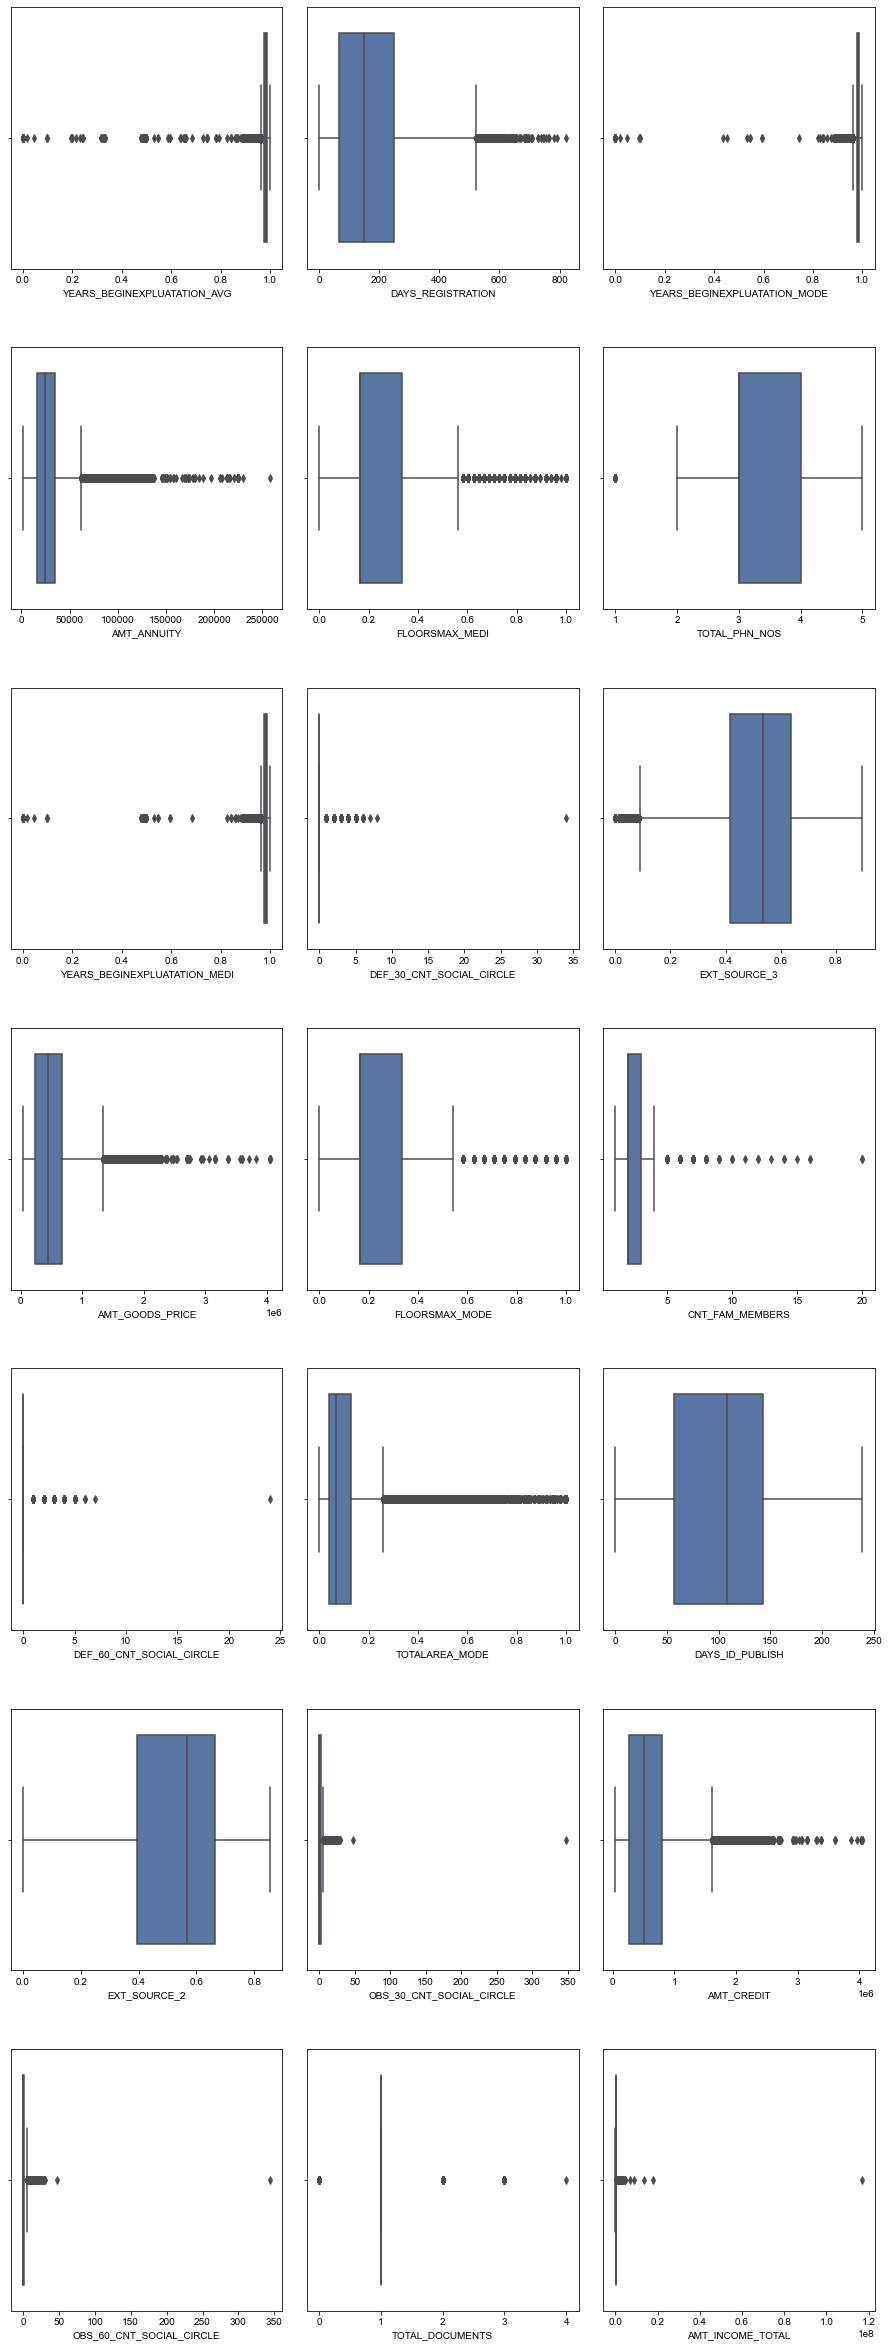

In [53]:
fig , axes = plt.subplots(nrows=7, ncols=3, constrained_layout=True)                 # Plot Configuration 
fig.subplots_adjust(left= 1, bottom=0, right=3, top=8, wspace=0.09, hspace=0.3)

sns.set_theme(style="white")

for ax, column in zip(axes.flatten(),numeric_col_outliers):        #Using For loop 
    sns.boxplot(apps_data1[column],ax=ax,orient="v")   #Ploting 

## Inferences:

- Majority of the people submitted just 1 document during loan applications. We found a few applications where the total docuemnts submitted is 0

- We have few applications in which the applicant has changed his registration atleast 20 years before the date of applications, these values have to be treated as outliers for this column

- There appears to be no outliers in the variable days_of_birth. As all of our applications lie between 20 and 80 years

- Applicants who have atleast 5 children are treated as outliers in our dataset

- Days_emplyd column shows that there are some applicants who have employed for more than 200 months (~17 years) and the highest value we observed here Is around 50 years of experience. We treat all such observations as outliers in this column

- All the applicants who have changed their phone numbers 10 or more years ago are treated as outliers in our dataset

- From the box plot of the variable OBS_60_CNT_SOCIAL_CIRCLE, we can observe that the majority of this variable has a value of 1 and an extreme value of 350, which needs to be removed. A similar trend is observed in the other variables which talks abou the dpd cases in the social circle of the applicant

- Most of the applicants pay a annuit of around 60,000 in a year. We even have some applicants who pay almost 2,50,000 as annuity for the whole year

- The goods price for which the applicants have taken a loan suggests that the needs of applicants are generally less than 10,00,000 but there are cases when the price of good is almost 40,00,000. ( must be home loans/mortgages)

- AMT_CREDIT with values greater than 15,00,000 are observed as outliers in the box plot, but they are not necessarily outlier and we will keep them as it is for our analysis. 

- There is an extreme observation who has an income of around 12 crore which need to be removed before doing further analysis

- Since ext_score_3 is already a normalized value, the box plot confirms that all the observations lie between 0 and 1 and a very small proportaion of it lies below 0.1 indicating that these people have a very low credit score


- Box plot of our derived variable total_phns show that, all the applicants have given atleast 1 phn number


- Most of the applicants come from a family of size 5 members, but we have a very few observations whose family size is greater than 5. We have observed the largest size of the family is around 20


- EXT_Score_2 box plot indicates that all the values lie between 0 and 0.8 indicating that we do not have a population who has a very high credit score according to the sourceext_score_2

- Clearly days_id_publish shows that there are no outliers for this variable



### Outlier Treatment

In [54]:
print("Rows before outlier treatment :", apps_data1.shape[0])

apps_data1 = apps_data1[apps_data1['DAYS_LAST_PHONE_CHANGE']<116.5] # NOte that we converted this variable from days to months
apps_data1 = apps_data1[apps_data1['OBS_30_CNT_SOCIAL_CIRCLE']<45]
apps_data1 = apps_data1[apps_data1['OBS_60_CNT_SOCIAL_CIRCLE']<45]
apps_data1 = apps_data1[apps_data1['AMT_INCOME_TOTAL']<0.4*1e8]

print("Rows after outlier treatment  :", apps_data1.shape[0])

Rows before outlier treatment : 307511
Rows after outlier treatment  : 307059


## Analysis

In [55]:
target_count_1 = (apps_data1['TARGET']==1).sum()
target_count_0 = (apps_data1['TARGET']==0).sum()

print(" Proportion of applicants who have payment difficulties :", round((target_count_1/len(apps_data1))*100,2))
print(" Proportion of applicants who do not have payment difficulties :", round((target_count_0/len(apps_data1))*100,2))

print(" Data imbalance ratio :",round(target_count_0/target_count_1,2))

 Proportion of applicants who have payment difficulties : 8.08
 Proportion of applicants who do not have payment difficulties : 91.92
 Data imbalance ratio : 11.38


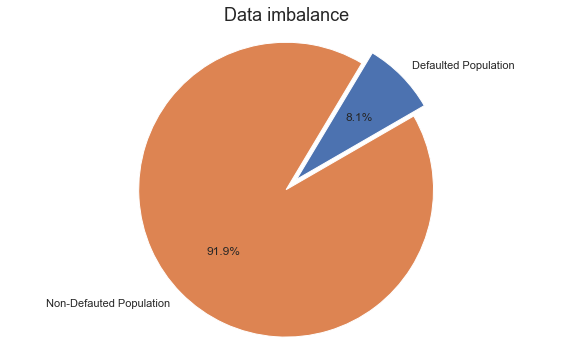

In [56]:
labels = ['Defaulted Population','Non-Defauted Population']
data = [target_count_1/len(apps_data1), target_count_0/len(apps_data1)]

explode = (0.1, 0)  # only "explode" the 1st slice

pie, ax = plt.subplots(figsize=[10,6])
ax.pie(data, explode=explode, labels=labels, autopct='%1.1f%%', startangle=30)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Data imbalance',fontsize=18)
plt.show()

### Divide the data into two sets, i.e., Target-1 and Target-0

In [57]:
application_data_1 = apps_data1[apps_data1['TARGET']==1]
application_data_0 = apps_data1[apps_data1['TARGET']==0]

## Univariante Analysis of Categorical columns with respect to Target variable

## Gender Distribution based on Target variable

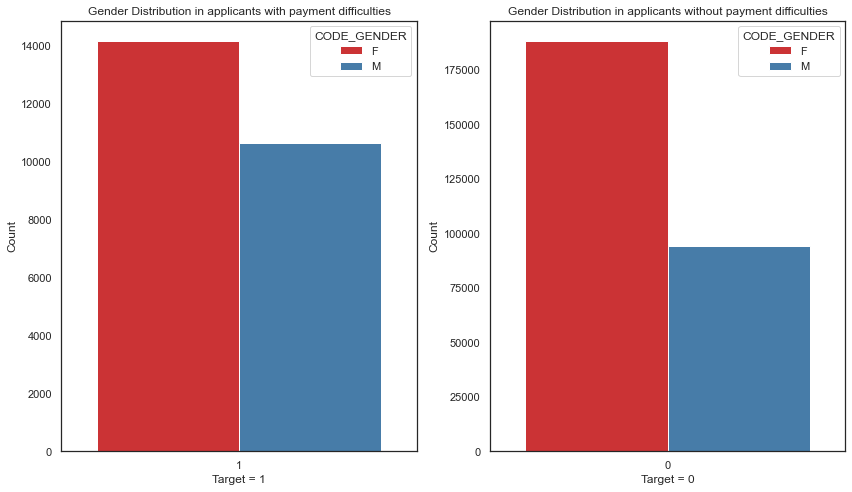

In [58]:
plt.figure(figsize=(12,7))
plt.subplot(121)
sns.countplot(x='TARGET',hue='CODE_GENDER',data=application_data_1, palette = 'Set1')
plt.title("Gender Distribution in applicants with payment difficulties")
plt.xlabel("Target = 1")
plt.ylabel("Count")
plt.subplot(122)
sns.countplot(x='TARGET',hue='CODE_GENDER',data=application_data_0, palette = 'Set1')
plt.title("Gender Distribution in applicants without payment difficulties")
plt.xlabel("Target = 0")
plt.ylabel("Count")
plt.tight_layout() 
plt.show()

In [59]:
print((application_data_1['CODE_GENDER'].value_counts()/len(application_data_1))*100)
print((application_data_0['CODE_GENDER'].value_counts()/len(application_data_0))*100)

F    57.073171
M    42.926829
Name: CODE_GENDER, dtype: float64
F    66.620845
M    33.379155
Name: CODE_GENDER, dtype: float64


## Inferences:
- From the dataset it appears that **Female clients applied higher than male clients for loan**
- **`66.62% Female`** clients are **non-defaulters** while **`33.37% male`** clients are **non-defaulters**.
- **`57.07% Female`** clients are **defaulters** while **`42.92% male`** clients are **defaulters**.

## Age Distribution based on Target variable


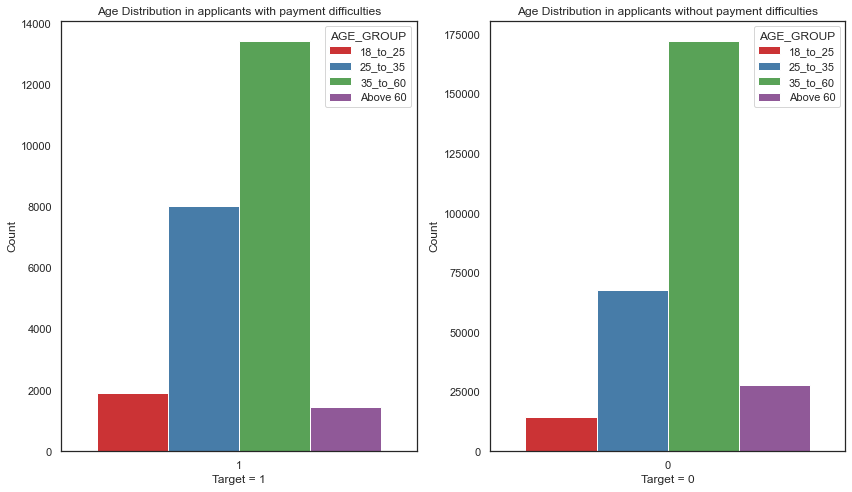

In [60]:
plt.figure(figsize=(12,7))
plt.subplot(121)
sns.countplot(x='TARGET',hue='AGE_GROUP',data=application_data_1, palette = 'Set1')
plt.title("Age Distribution in applicants with payment difficulties")
plt.xlabel("Target = 1")
plt.ylabel("Count")
plt.subplot(122)
sns.countplot(x='TARGET',hue='AGE_GROUP',data=application_data_0, palette = 'Set1')
plt.title("Age Distribution in applicants without payment difficulties")
plt.xlabel("Target = 0")
plt.ylabel("Count")
plt.tight_layout() 
plt.show()

## Inferences:

- **`35-60`** group seems to applied higher than any other age group for loan in case of Defaulters as well as Non-defaulters.

- Also , **`35-60`** group facing paying difficulties the most.

- While **`>60`** and **`18-25`** age group facing paying difficulties less as compared to other age groups.

## Income Distribution based on Target variable

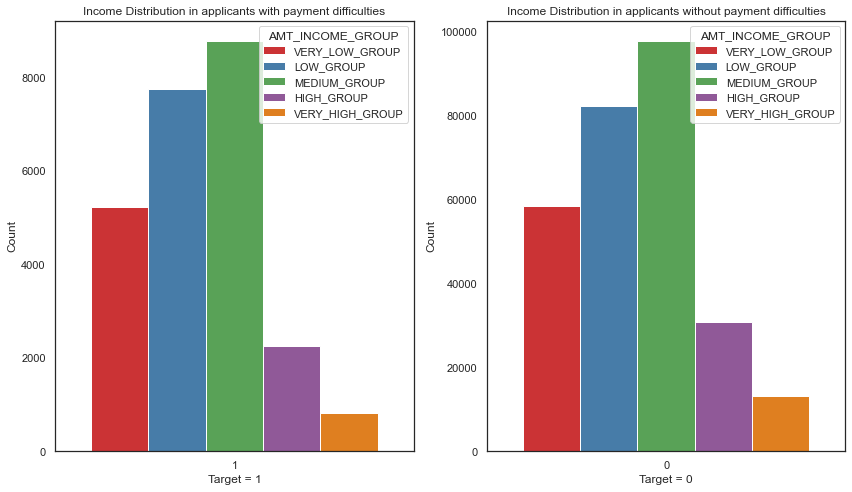

In [61]:
plt.figure(figsize=(12,7))
plt.subplot(121)
sns.countplot(x='TARGET',hue='AMT_INCOME_GROUP',data=application_data_1, palette = 'Set1')
plt.title("Income Distribution in applicants with payment difficulties")
plt.xlabel("Target = 1")
plt.ylabel("Count")
plt.subplot(122)
sns.countplot(x='TARGET',hue='AMT_INCOME_GROUP',data=application_data_0, palette = 'Set1')
plt.title("Income Distribution in applicants without payment difficulties")
plt.xlabel("Target = 0")
plt.ylabel("Count")
plt.tight_layout() 
plt.show()

## Inferences:

- Applicants with income in the **`MEDIUM`** group seems to applied higher than any other income group for loan in case of Defaulters as well as Non-defaulters.

- Also , applicants with income in the **`MEDIUM`** group are facing paying difficulties the most when compared to other groups.

- As expected, the applicants with **`VERY HIGH`** income, face less paying difficulties when compared to other income groups.

## Credit Group Distribution based on Target variable

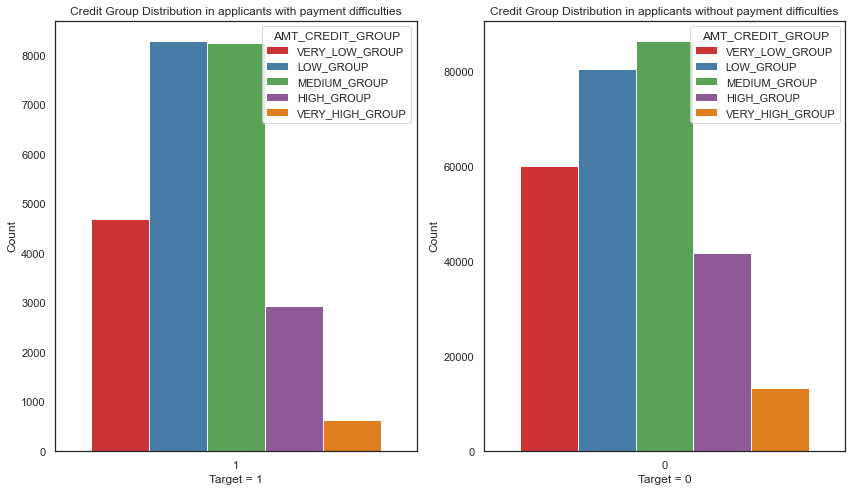

In [62]:
plt.figure(figsize=(12,7))
plt.subplot(121)
sns.countplot(x='TARGET',hue='AMT_CREDIT_GROUP',data=application_data_1, palette = 'Set1')
plt.title("Credit Group Distribution in applicants with payment difficulties")
plt.xlabel("Target = 1")
plt.ylabel("Count")
plt.subplot(122)
sns.countplot(x='TARGET',hue='AMT_CREDIT_GROUP',data=application_data_0, palette = 'Set1')
plt.title("Credit Group Distribution in applicants without payment difficulties")
plt.xlabel("Target = 0")
plt.ylabel("Count")
plt.tight_layout() 
plt.show()

## Inferences:

- Applicants who have applied for  **`MEDIUM`** amount of loan are high compared to any other loan group in case of Defaulters as well as Non-defaulters.

- Also , applicants who have applied for a **`MEDIUM`** loan are facing paying difficulties the most when compared to other groups.

- Aapplicants who have applied for **`VERY HIGH`** loan, face less paying difficulties when compared to other loan groups possibly because of higher repaying capability from their high income.

## Education Type Distribution based on Target variable

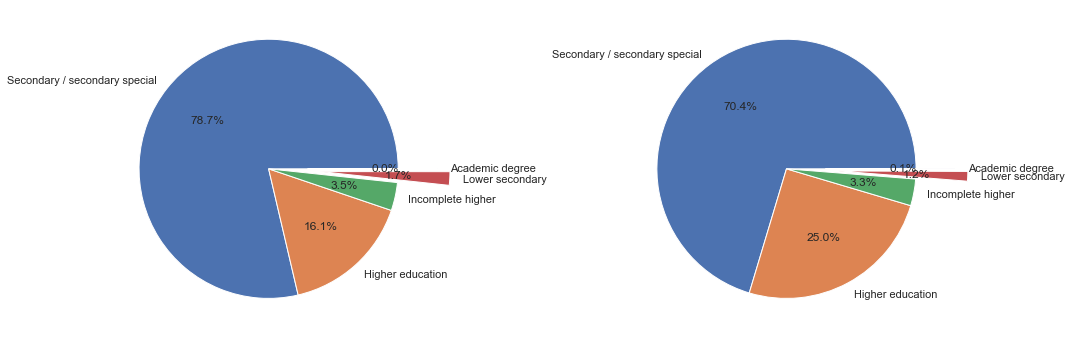

In [63]:
labels = list(apps_data1.NAME_EDUCATION_TYPE.value_counts().index)
edu_1 = list(application_data_1.NAME_EDUCATION_TYPE.value_counts(normalize=True))
edu_0 = list(application_data_0.NAME_EDUCATION_TYPE.value_counts(normalize=True))

fig, axs = plt.subplots(1, 2,figsize=[15,12])
exp = ( 0, 0, 0, 0.4, 0.3)
axs[0].pie(edu_1, labels=labels, autopct='%1.1f%%', explode=exp, shadow=False)

axs[1].pie(edu_0, labels=labels, autopct='%1.1f%%', explode=exp, shadow=False)

plt.tight_layout()
plt.show()


- From the plot above, we can conclude that secondary/special educated people applying for loans are high in number in both categories and Academic degree educated are least.


## Family Type Distribution based on Target variable

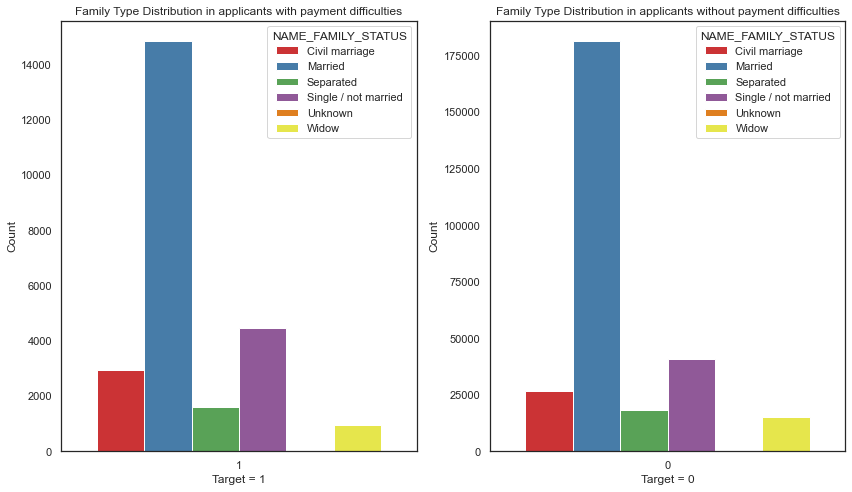

In [64]:
plt.figure(figsize=(12,7))
plt.subplot(121)
sns.countplot(x='TARGET',hue='NAME_FAMILY_STATUS',data=application_data_1, palette = 'Set1')
plt.title("Family Type Distribution in applicants with payment difficulties")
plt.xlabel("Target = 1")
plt.ylabel("Count")
plt.subplot(122)
sns.countplot(x='TARGET',hue='NAME_FAMILY_STATUS',data=application_data_0, palette = 'Set1')
plt.title("Family Type Distribution in applicants without payment difficulties")
plt.xlabel("Target = 0")
plt.ylabel("Count")
plt.tight_layout() 
plt.show()

- The order of both default and not default customers is same i.e., Married,Single/not married,civil marriage,seperated,widow
- It also shows that there exists few(1 or 2) unknown values in not default client family status.
- We can say more married people tend to take more Loan as compaired to other categories and being married is not impacting default and not defaulting

## Name Income Type Distribution based on Target variable

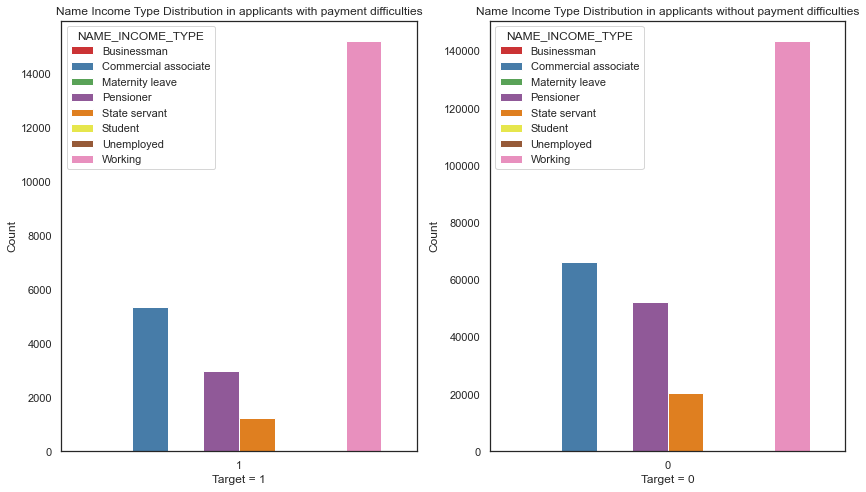

In [65]:
plt.figure(figsize=(12,7))
plt.subplot(121)
sns.countplot(x='TARGET',hue='NAME_INCOME_TYPE',data=application_data_1, palette = 'Set1')
plt.title("Name Income Type Distribution in applicants with payment difficulties")
plt.xlabel("Target = 1")
plt.ylabel("Count")
plt.subplot(122)
sns.countplot(x='TARGET',hue='NAME_INCOME_TYPE',data=application_data_0, palette = 'Set1')
plt.title("Name Income Type Distribution in applicants without payment difficulties")
plt.xlabel("Target = 0")
plt.ylabel("Count")
plt.tight_layout() 
plt.show()

- From the graphs below, we can conclude that Pensioner of not default case are high in number compared to Pensioner of default case.
- It seems there exists both loss and profit due to Pension people to the Bank.
- It also shows that majority of defaulters income type is working and at the same time there is good income to bank from working people.

## Housing Type Distribution based on Target variable

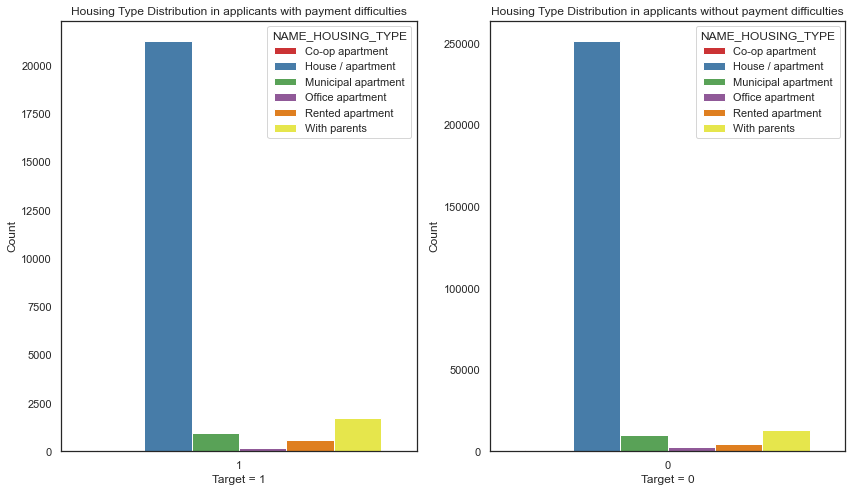

In [66]:
plt.figure(figsize=(12,7))
plt.subplot(121)
sns.countplot(x='TARGET',hue='NAME_HOUSING_TYPE',data=application_data_1, palette = 'Set1')
plt.title("Housing Type Distribution in applicants with payment difficulties")
plt.xlabel("Target = 1")
plt.ylabel("Count")
plt.subplot(122)
sns.countplot(x='TARGET',hue='NAME_HOUSING_TYPE',data=application_data_0, palette = 'Set1')
plt.title("Housing Type Distribution in applicants without payment difficulties")
plt.xlabel("Target = 0")
plt.ylabel("Count")
plt.tight_layout() 
plt.show()

- From graph we can conclude that there exists people who have own house lies in both default and non default.

## Loan Type Distribution based on Target variable

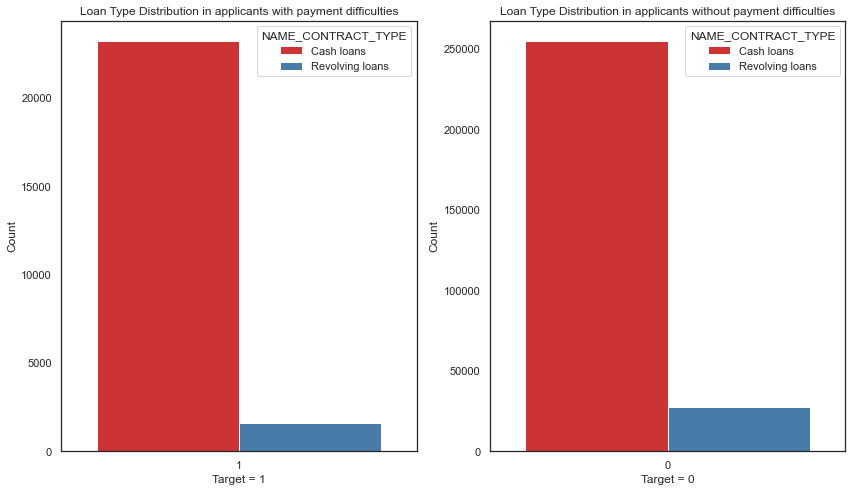

In [67]:
plt.figure(figsize=(12,7))
plt.subplot(121)
sns.countplot(x='TARGET',hue='NAME_CONTRACT_TYPE',data=application_data_1, palette = 'Set1')
plt.title("Loan Type Distribution in applicants with payment difficulties")
plt.xlabel("Target = 1")
plt.ylabel("Count")
plt.subplot(122)
sns.countplot(x='TARGET',hue='NAME_CONTRACT_TYPE',data=application_data_0, palette = 'Set1')
plt.title("Loan Type Distribution in applicants without payment difficulties")
plt.xlabel("Target = 0")
plt.ylabel("Count")
plt.tight_layout() 
plt.show()

- People tend to take more cash loans, and default percentage of revolving loans is less

# Univariante Analysis of Numerical columns with respect to Target variable

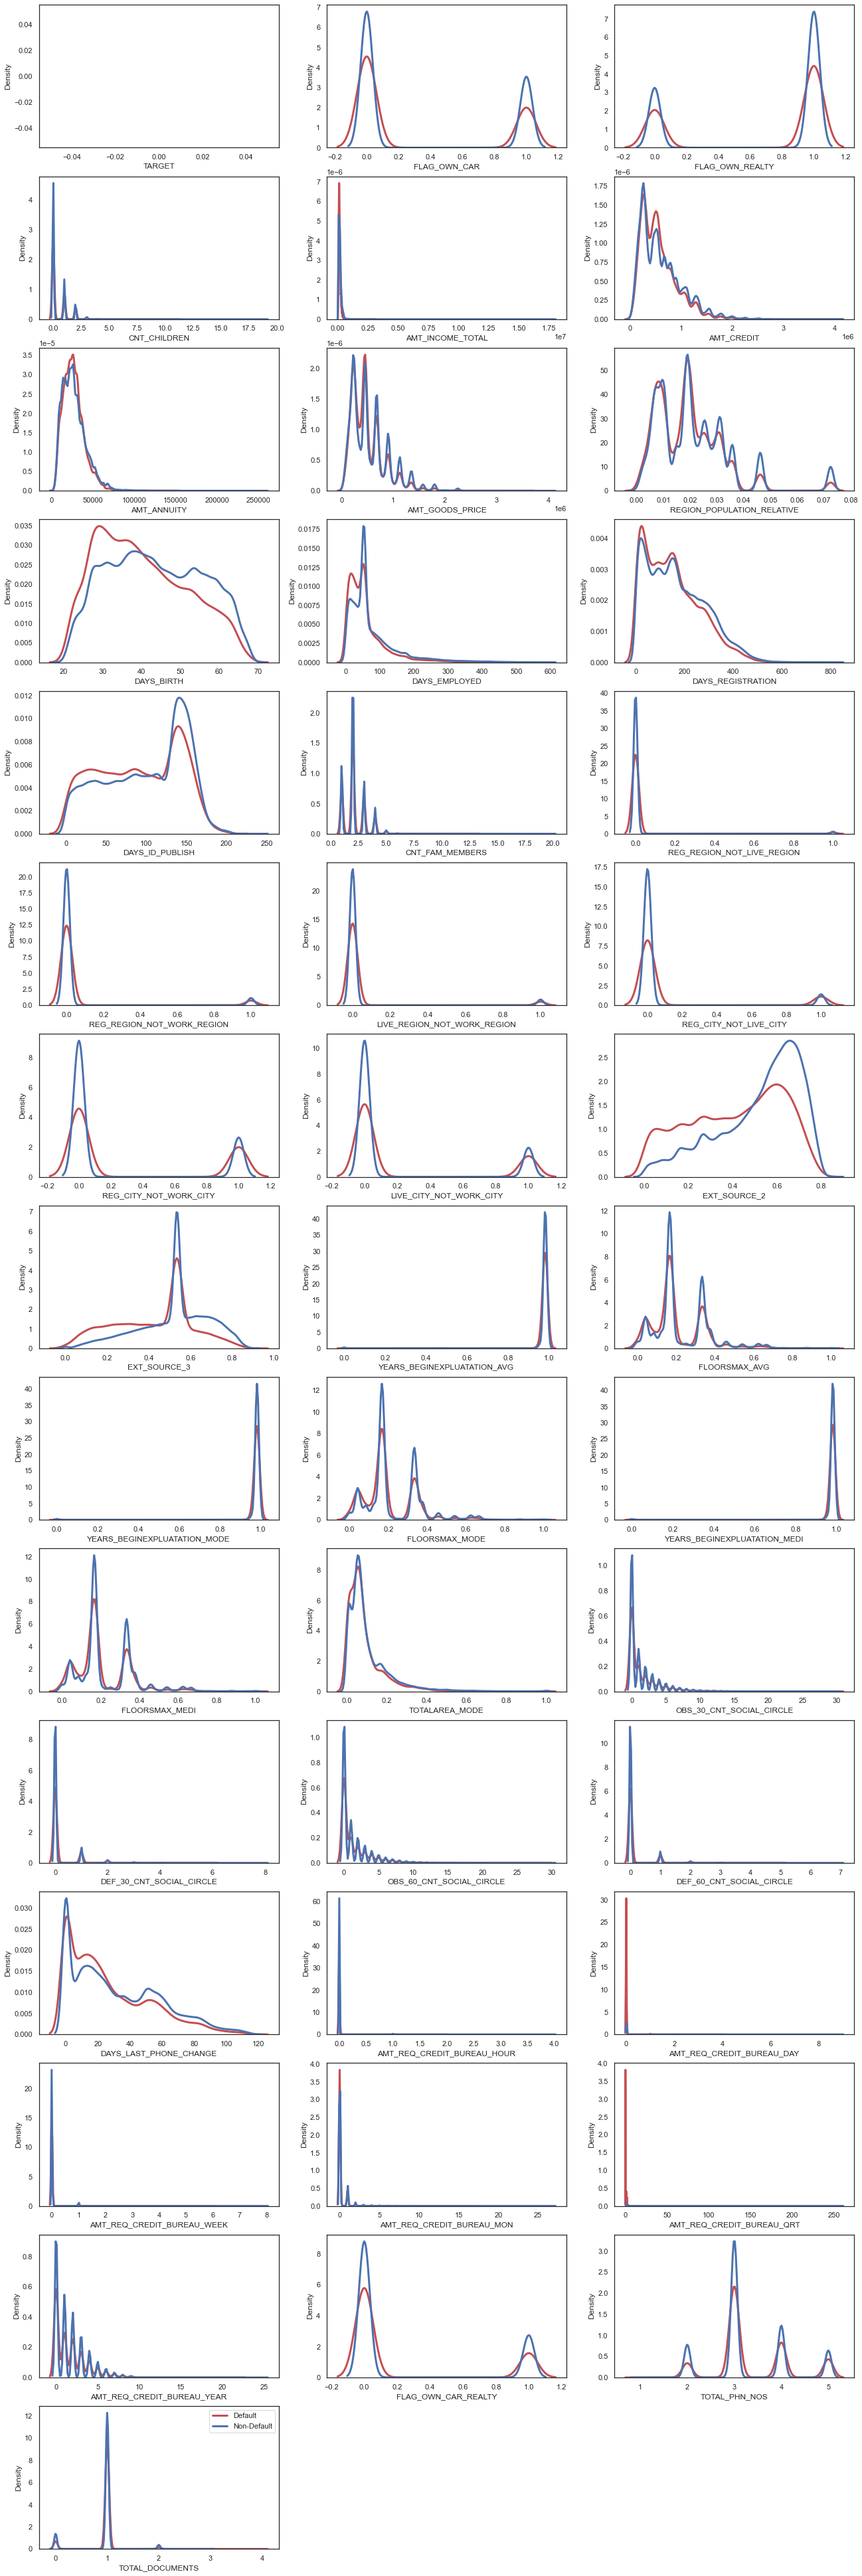

In [69]:
continous_columns=list(application_data_1.select_dtypes(include='number').columns)

plt.figure(figsize=(22,80))
for i in (enumerate(continous_columns)):
    plt.subplot(len(continous_columns)//3+3,3,i[0]+1)
    sns.distplot(application_data_1[i[1]].dropna(), color="r", hist=False, kde_kws={"lw": 3},label='Default')
    sns.distplot(application_data_0[i[1]].dropna(), color="b", hist=False, kde_kws={"lw": 3},label='Non-Default')
plt.legend()
plt.show()   

### Key Inferences:
As we can see from graphs

- Applicants who don't have a car are more in both the categories of Defaults and Non- Defaults. 
- This case is reverse in terms of ownership of a house/apartment.That is, applicants who have their own house makes a higher proportion in the case of both defaulters and non-defaulters.
- Most defaulters are typically in their early 30's.
- Applicants who have work experience between 40-50 months typically experience paying difficulties compared to other applicants. 
- From the density curve of CNT_CHILDREN  we observe that the count of the applicant's children do not have any influence on the repaying capabilities of the applicant. 
- Applicants with lower total income are more likely to default
- Applicants who just got employed tends to take more loans
- Applicants who retired tends to take more loans
- Applicants whose id(s) got published between 130 and 150 months ago tend to take more loans
- Applicants with normalized score between 0.4 and 0.6 is high in case of score pooled from EXT_SOURCE_3. Also, there is no representationn of applicants with normalized score above 0.8 in the case of EXT_SOURCE_2. 


In [70]:
# for i in (enumerate(continous_columns)):
#     print(i)
#     print(i[0])
#     print(i[1])
#     print("\n")

## Bivariate Analysis

### Applicants without payment difficulties

#### Effect of Income_Amount , Education_Status    and FAMILY_Status  on Applicants with no payment difficulties

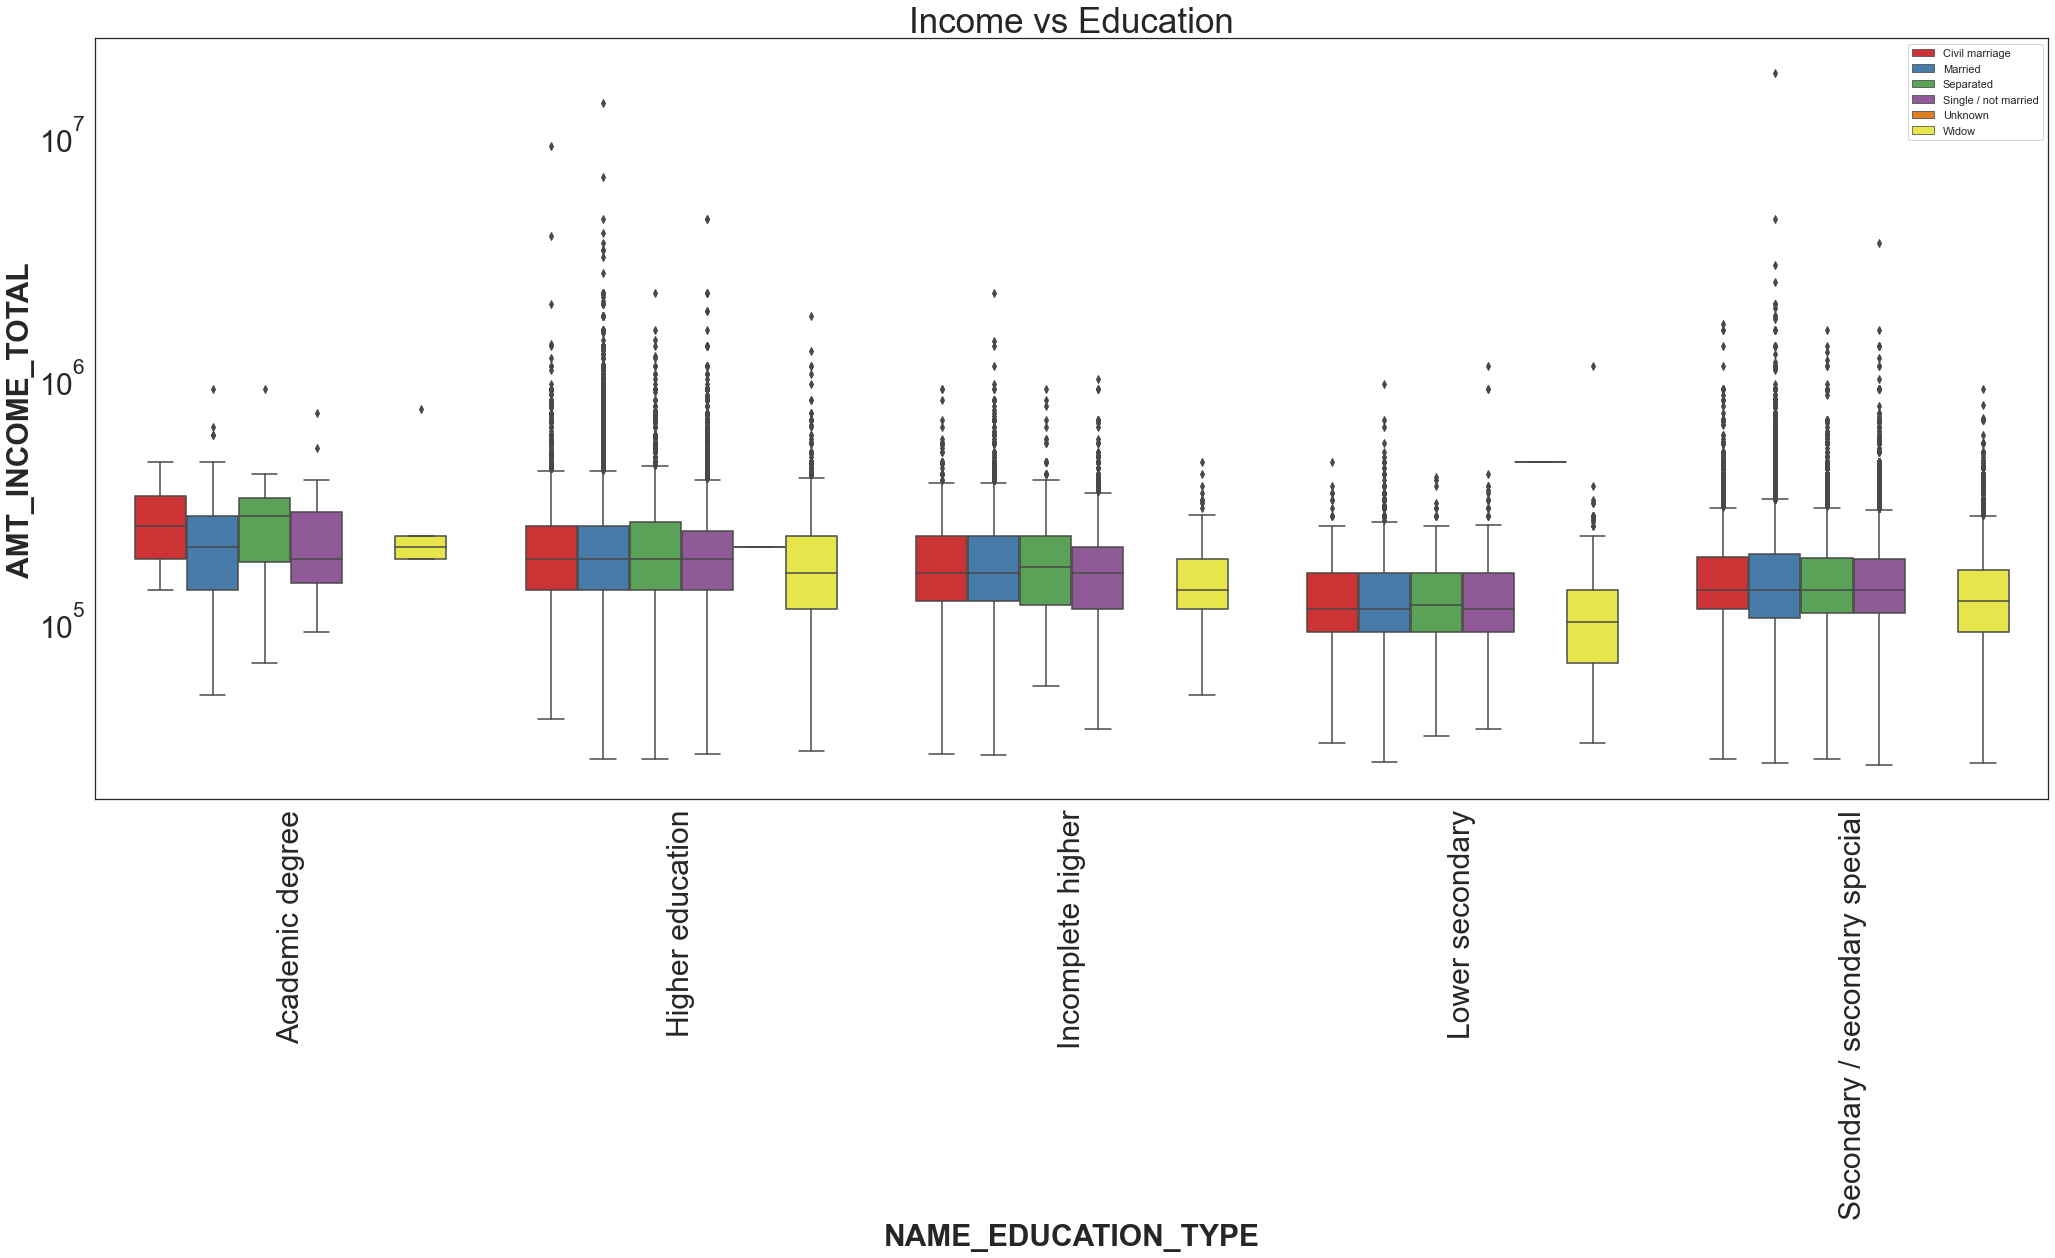

In [71]:
plt.figure(figsize=(35,14)) 
plt.yscale('log')                     #As the values are too large, it is convinient to use log for better analysis
plt.xticks(rotation = 90)


sns.boxplot(data =application_data_0, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL',   #Boxplot w.r.t Data Target 0
            hue ='NAME_FAMILY_STATUS',orient='v',palette='Set1')


plt.legend( loc = 'upper right')                                              #Adjusting legend position
plt.title('Income vs Education',fontsize=35 )
plt.xlabel("NAME_EDUCATION_TYPE",fontsize= 30, fontweight="bold")
plt.ylabel("AMT_INCOME_TOTAL",fontsize= 30, fontweight="bold")
plt.xticks(rotation=90, fontsize=30)
plt.yticks(rotation=360, fontsize=30)

plt.show()

### Inferences:

-  Applicants with Academic degree have a very few outliers as compared to other types of education.


-  Applicants who have Higher Education, Incomplete Higher Education, Lower Secondary Education and Secondary/Secondary Special have a higher number of outliers.


-  As expected,from the above figure it is evident that, applicants who have Higher Education tend to have highest Income compared to others. Also, some of the applicants who haven't completed their Higher Education tend to have higher Income.



### Effect of Credit Amount, Education status and  FAMILY_Status  in applicants with no payment difficulties.

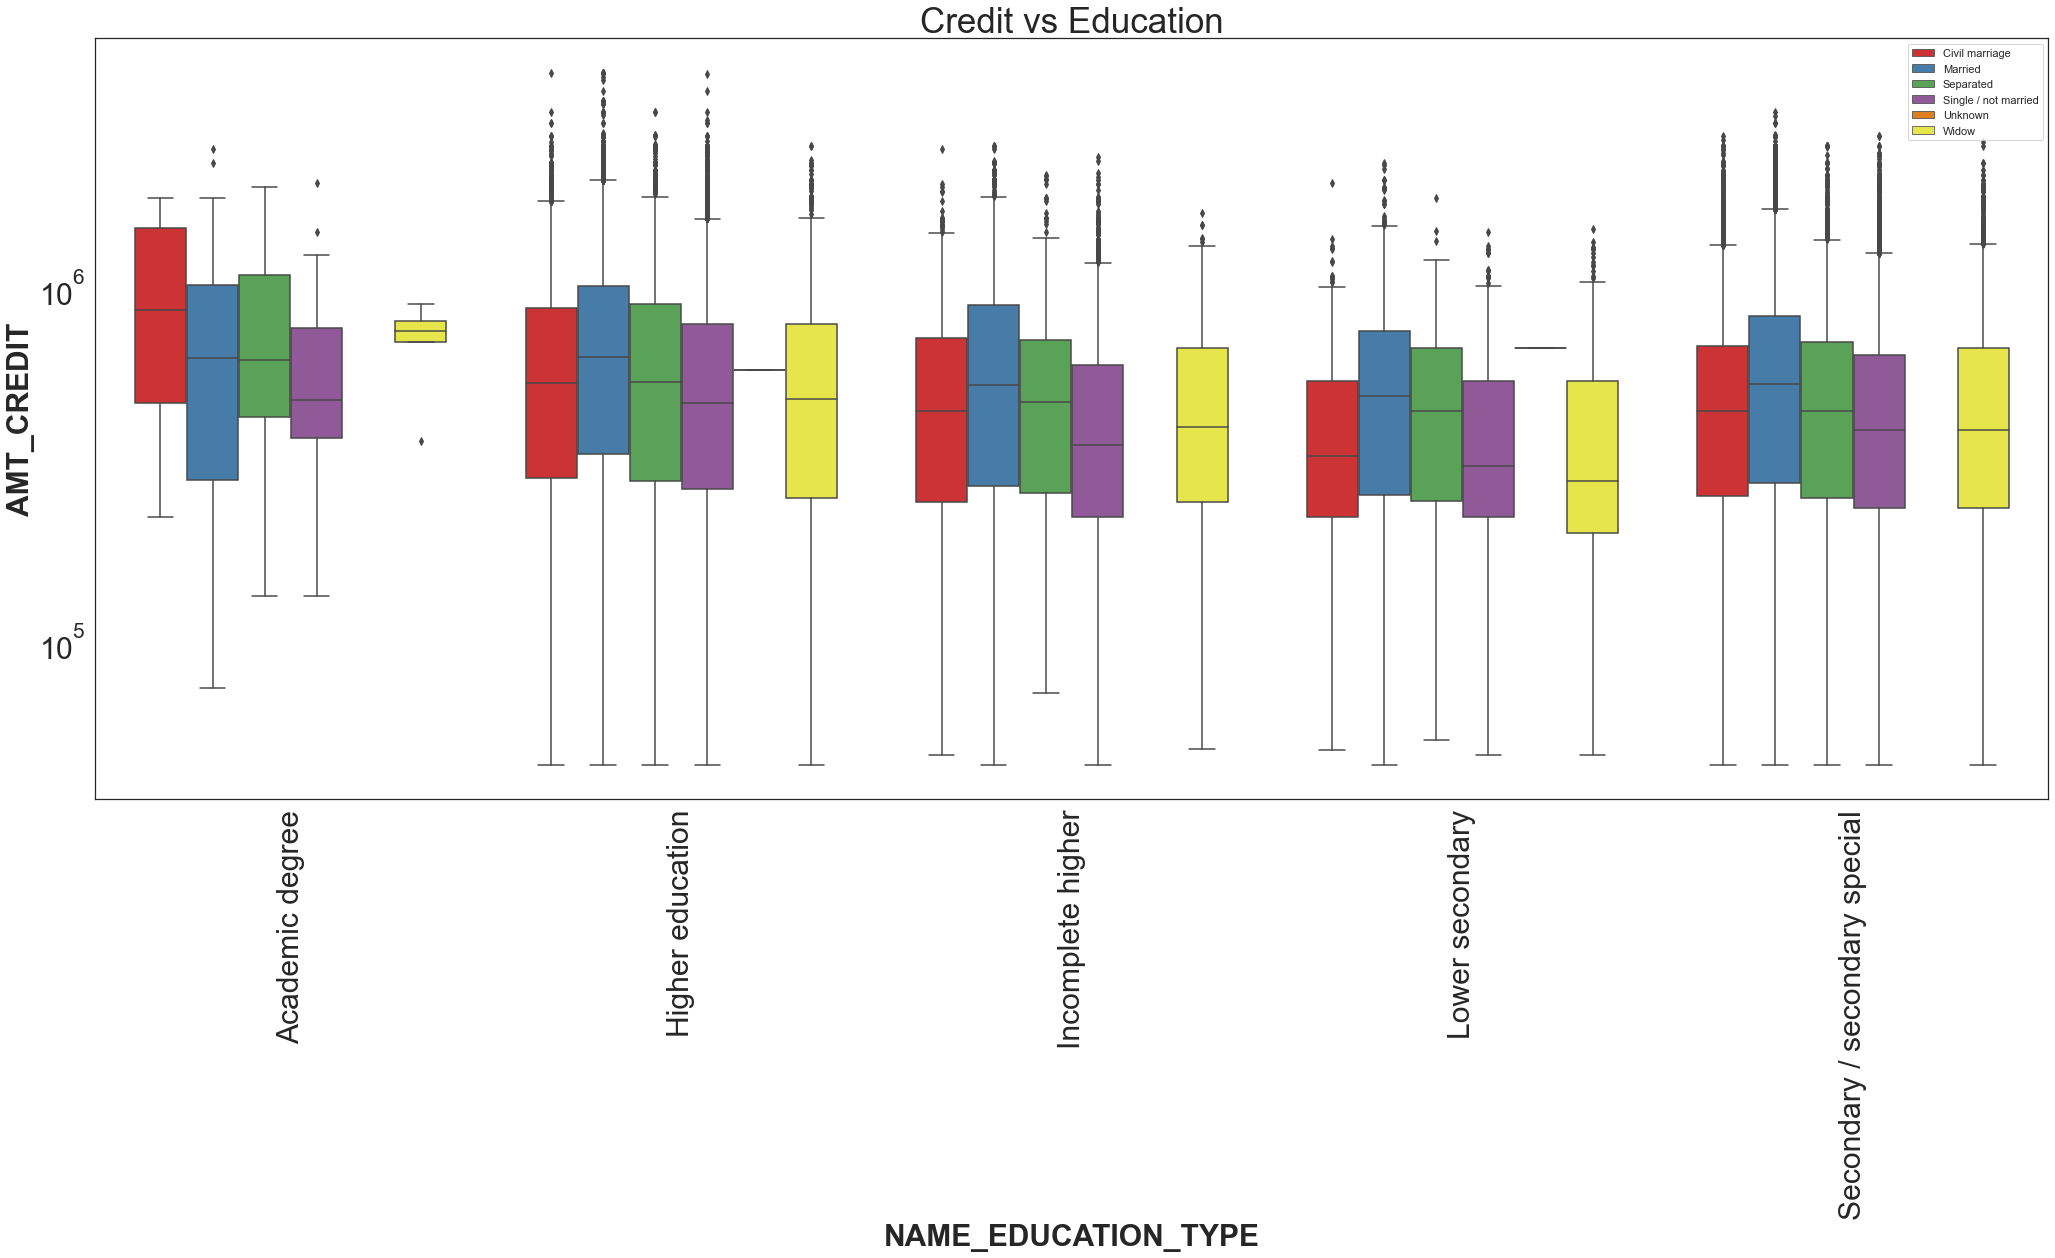

In [72]:
plt.figure(figsize=(35,14))
plt.yscale('log')                      #As the values are too large, it is convinient to use log for better analysis
plt.xticks(rotation = 90)


sns.boxplot(data =application_data_0, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT',           #Boxplot w.r.t Data Target 0
            hue ='NAME_FAMILY_STATUS',orient='v',palette='Set1')


plt.legend(loc = 'upper right')            #Adjusting legend position
plt.title('Credit vs Education',fontsize=35 )
plt.xlabel("NAME_EDUCATION_TYPE",fontsize= 30, fontweight="bold")
plt.ylabel("AMT_CREDIT",fontsize= 30, fontweight="bold")
plt.xticks(rotation=90, fontsize=30)
plt.yticks(rotation=360, fontsize=30)

plt.show()

### Inferences:

- Applicants with all Education types except Academic degree have large number of outliers.


- Applicants with Academic degree and who did Civil Marriage tend to take higher credit loan.


- A very few  applicants with Higher Education, Incomplete Higher Education, Lower Secondary Education and Secondary/Secondary Special Eduacation are more likely to take high amount of credit loan(outliers).

### Applicants with payment difficulties

#### Effect of Income_Amount , Education_Status    and FAMILY_Status  on Applicants with payment difficulties

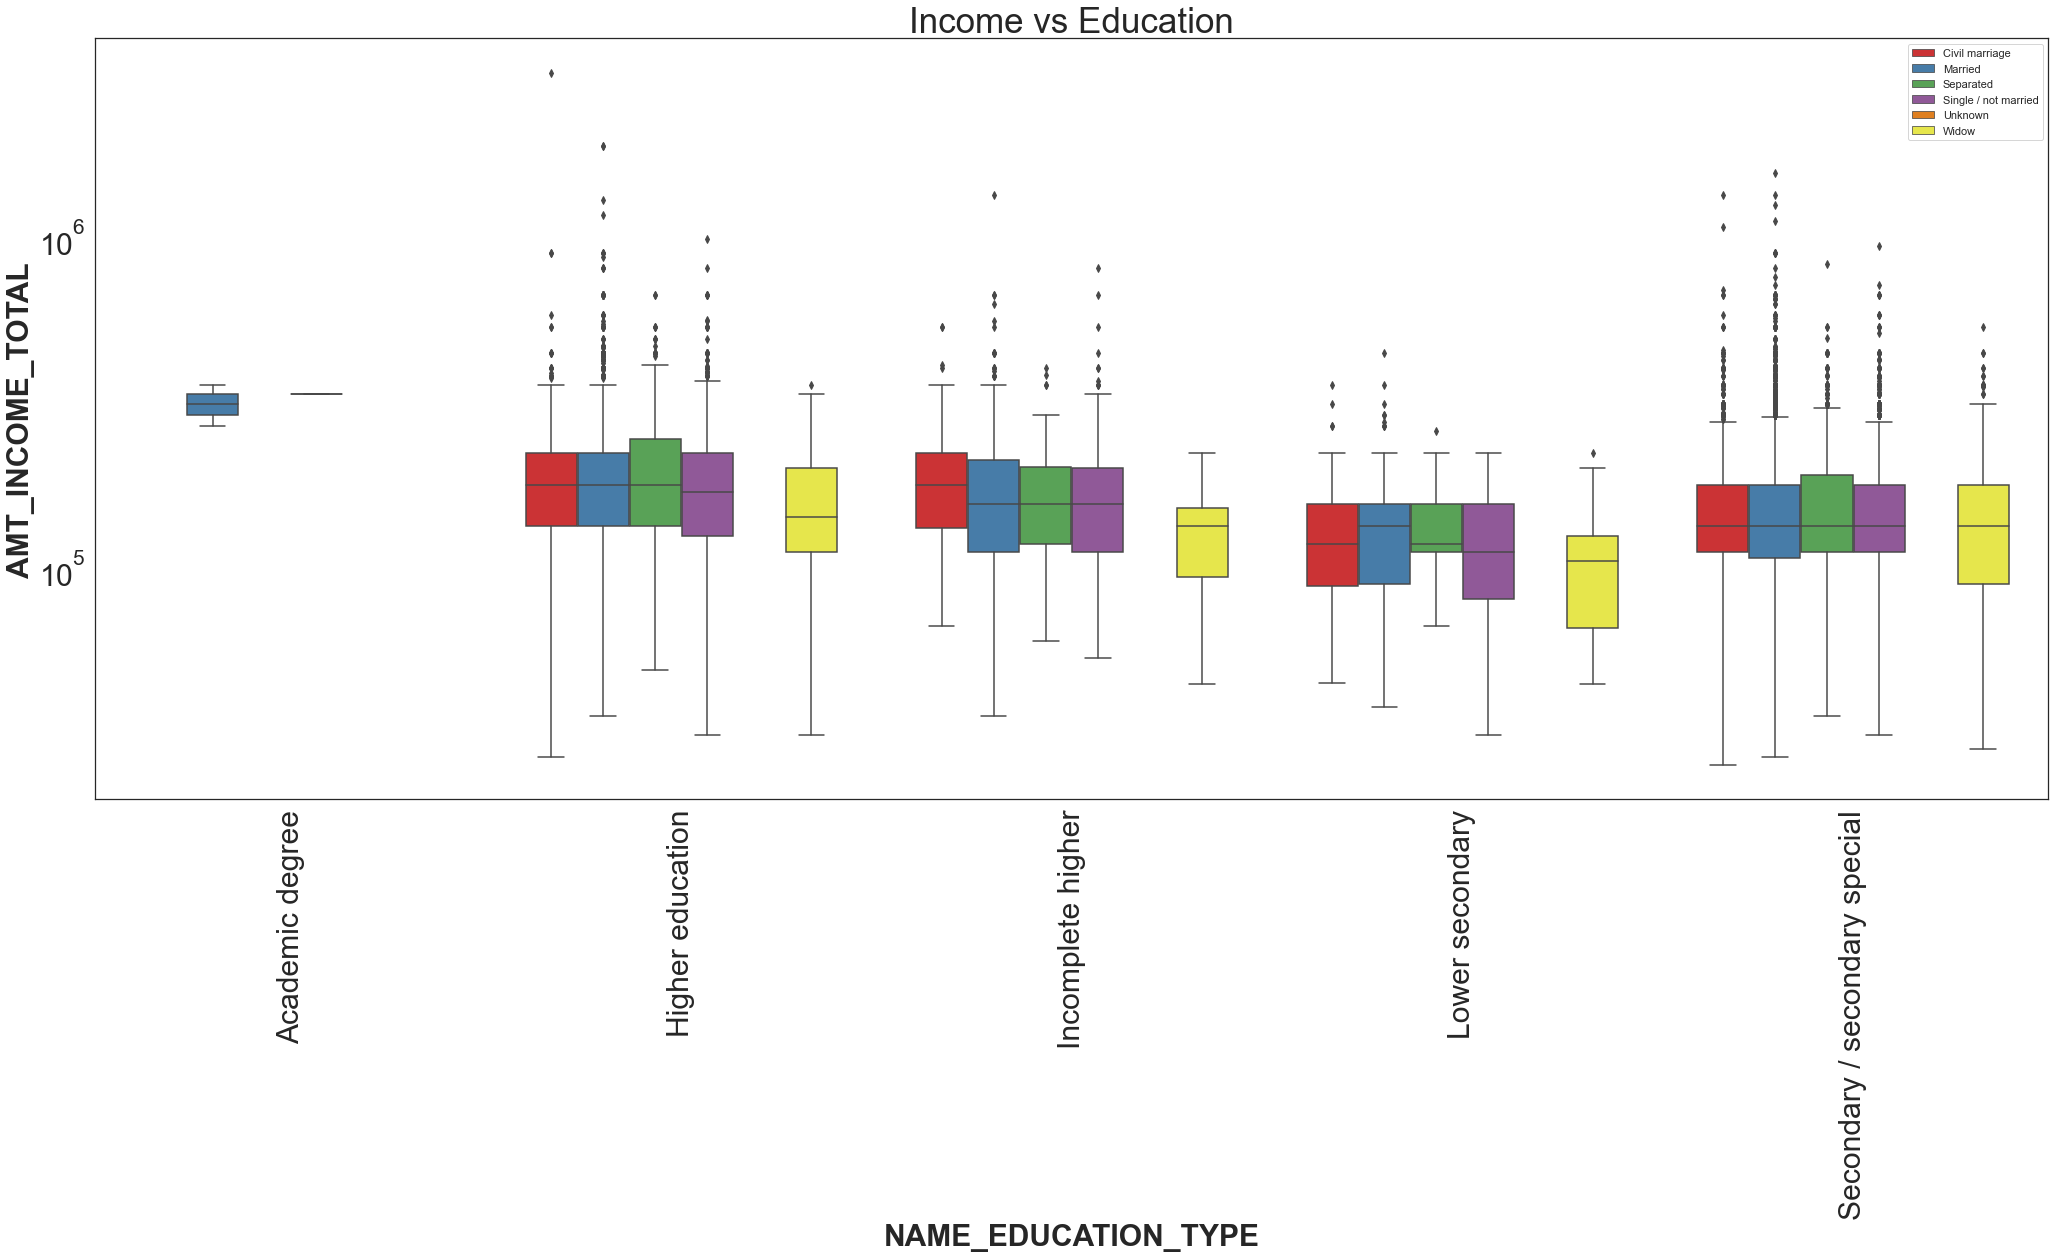

In [73]:
plt.figure(figsize=(35,14)) 
plt.yscale('log')                     #As the values are too large, it is convinient to use log for better analysis
plt.xticks(rotation = 90)


sns.boxplot(data =application_data_1, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL',   #Boxplot w.r.t Data Target 1
            hue ='NAME_FAMILY_STATUS',orient='v',palette='Set1')


plt.legend( loc = 'upper right')                                              #Adjusting legend position
plt.title('Income vs Education',fontsize=35 )
plt.xlabel("NAME_EDUCATION_TYPE",fontsize= 30, fontweight="bold")
plt.ylabel("AMT_INCOME_TOTAL",fontsize= 30, fontweight="bold")
plt.xticks(rotation=90, fontsize=30)
plt.yticks(rotation=360, fontsize=30)

plt.show()

### Inferences:

-  There are very few applicants with Academic degree and payment difficulties. These population has a higher income compared to ther education degrees.


-  Applicants who have Higher Education, Incomplete Higher Education, Lower Secondary Education and Secondary/Secondary Special have a higher number of outliers.


-  Applicants who have payment difficulties and have Secondary/Secondary education have higher income among other education groups



### Effect of Credit Amount, Education status and  FAMILY_Status  in applicants with payment difficulties.

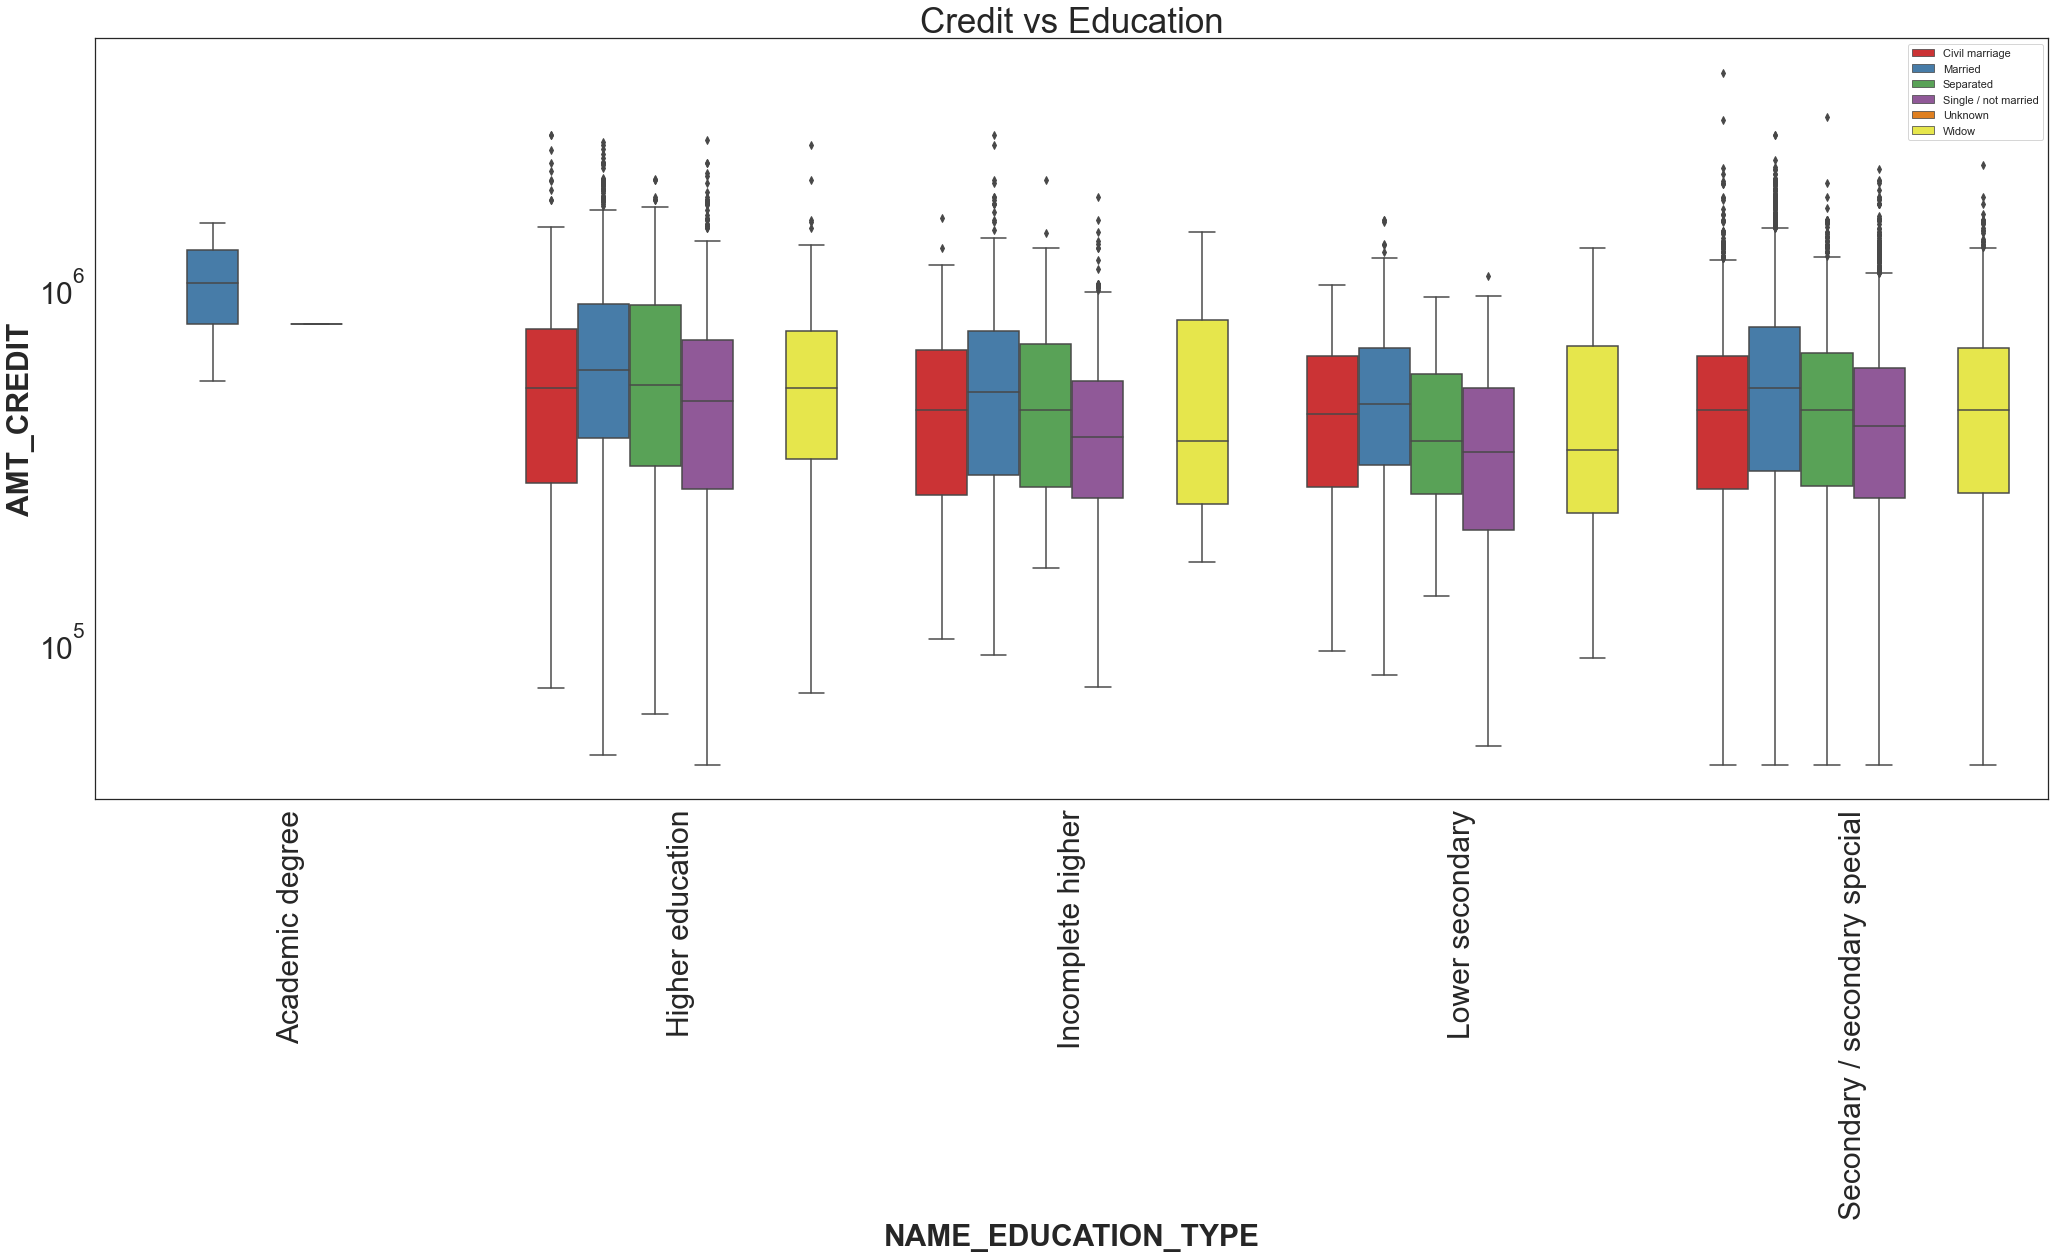

In [74]:
plt.figure(figsize=(35,14))
plt.yscale('log')                      #As the values are too large, it is convinient to use log for better analysis
plt.xticks(rotation = 90)


sns.boxplot(data =application_data_1, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT',           #Boxplot w.r.t Data Target 1
            hue ='NAME_FAMILY_STATUS',orient='v',palette='Set1')


plt.legend(loc = 'upper right')            #Adjusting legend position
plt.title('Credit vs Education',fontsize=35 )
plt.xlabel("NAME_EDUCATION_TYPE",fontsize= 30, fontweight="bold")
plt.ylabel("AMT_CREDIT",fontsize= 30, fontweight="bold")
plt.xticks(rotation=90, fontsize=30)
plt.yticks(rotation=360, fontsize=30)

plt.show()

### Inferences:

-  There are very few applicants who have an acedemic degree and went for a higher loan facing payment difficulties

-  Applicants who have Higher Education, Incomplete Higher Education, Lower Secondary Education and Secondary/Secondary Special have a higher number of outliers.

-  Applicants who have payment difficulties and have Secondary/Secondary education went for a higher loan among other education groups

# Correlations

### Correlations between numerical variables Using "Pair Plots "

In [75]:
continous_columns=list(application_data_1.select_dtypes(include='number').columns)
continous_columns

['TARGET',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'CNT_FAM_MEMBERS',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'YEARS_BEGINEXPLUATATION_AVG',
 'FLOORSMAX_AVG',
 'YEARS_BEGINEXPLUATATION_MODE',
 'FLOORSMAX_MODE',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'FLOORSMAX_MEDI',
 'TOTALAREA_MODE',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR',
 'FLAG_OWN_CAR_REALTY',
 'TO

### Pairplot for Target 0 in application_data_0, applicants with out payment difficulties.

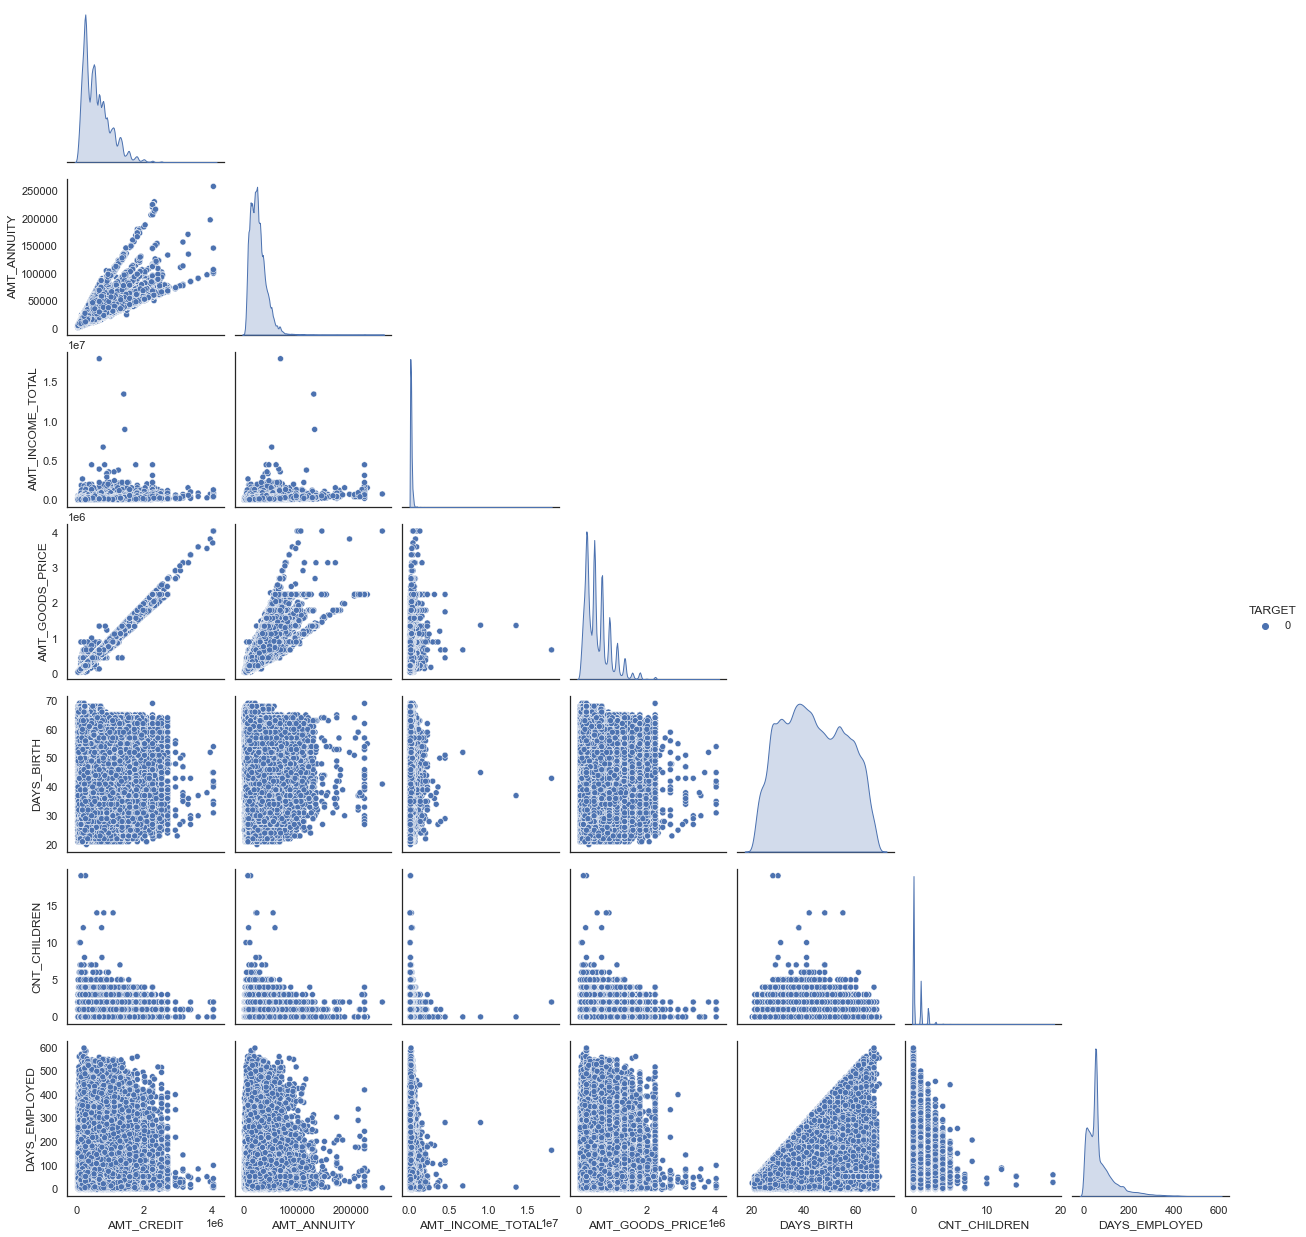

In [77]:
corre1 = application_data_0[['TARGET','AMT_CREDIT', 'AMT_ANNUITY', 'AMT_INCOME_TOTAL', 'AMT_GOODS_PRICE', 'DAYS_BIRTH','CNT_CHILDREN','DAYS_EMPLOYED']].fillna(0)
sns.pairplot(corre1, hue="TARGET", corner=True)
plt.show()

### Pairplot for Target 1 in application_data_1, applicants with payment difficulties.

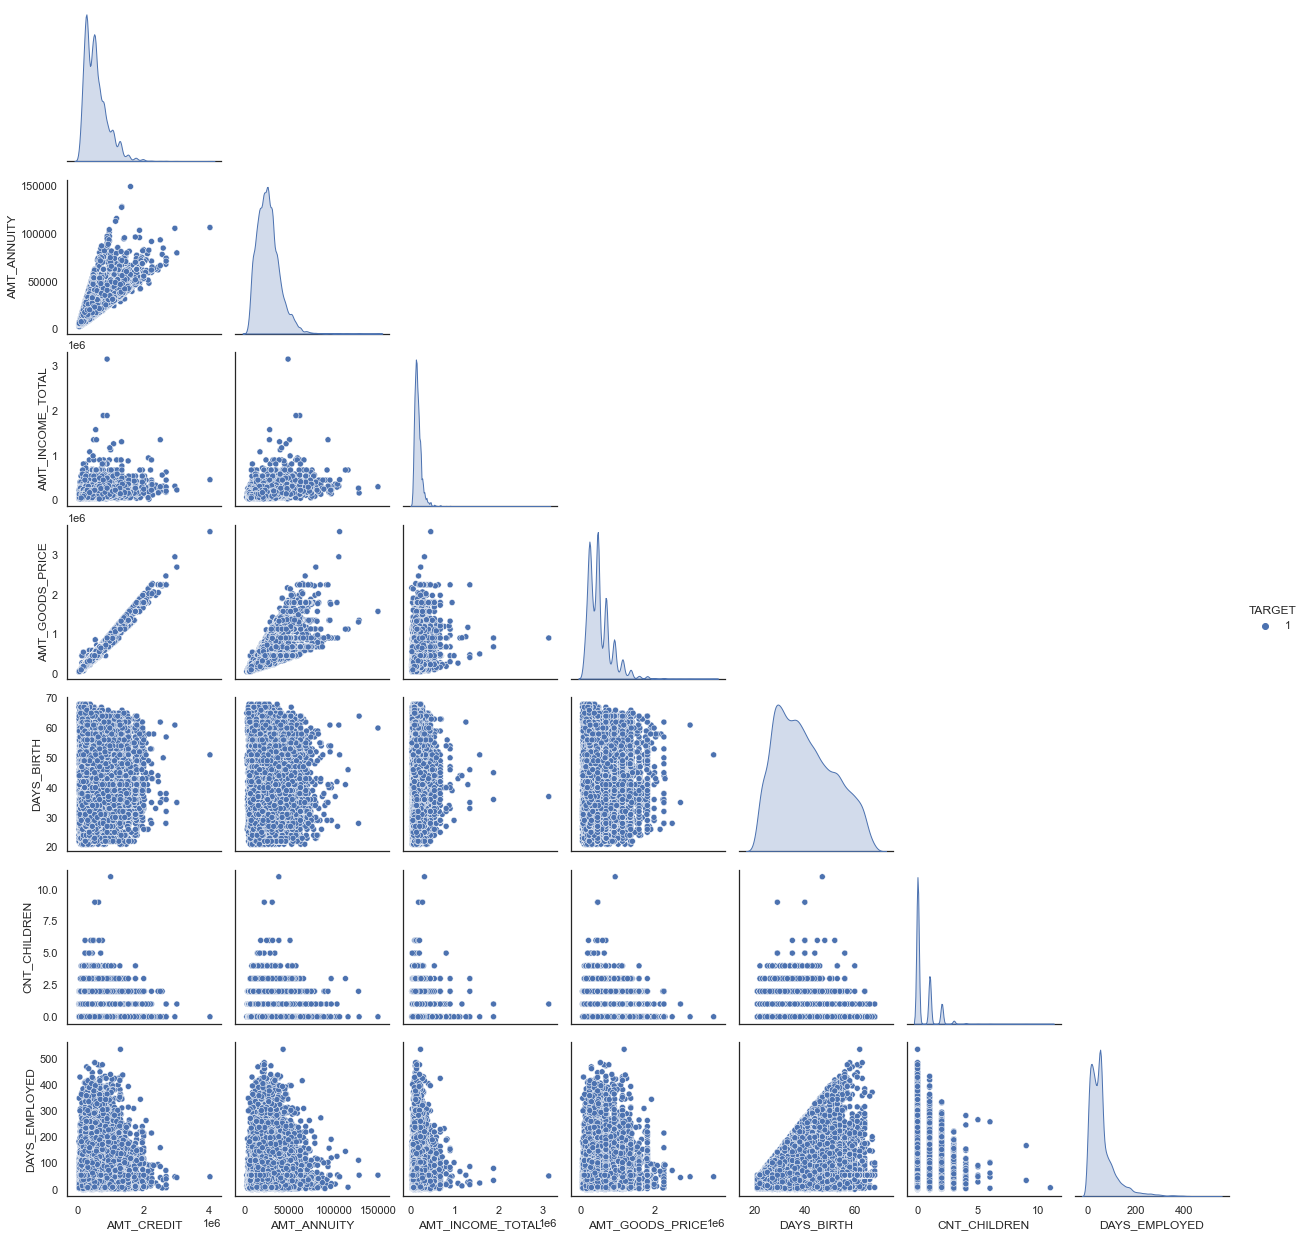

In [78]:
#pair = application_data_1[continous_columns]

pair = application_data_1[['TARGET','AMT_CREDIT', 'AMT_ANNUITY', 'AMT_INCOME_TOTAL', 'AMT_GOODS_PRICE', 'DAYS_BIRTH','CNT_CHILDREN','DAYS_EMPLOYED']].fillna(0)
sns.pairplot(pair, hue="TARGET", corner=True)
plt.show()

# Inferences:

- **`AMT_CREDIT`** and **`AMT_GOODS_PRICE`** are highly correlated variables for both defaulters and non - defaulters. So as the home price increases the loan amount also increases

- **`AMT_CREDIT`** and **`AMT_ANNUITY`** (EMI) are highly correlated variables for both defaulters and non - defaulters . So as the home price increases the EMI amount also increases which is logical
- All three variables **`AMT_CREDIT`**, **`AMT_GOODS_PRICE`** and **`AMT_ANNUITY`** are highly correlated for both defaulters and non-defaulters, which might not give a good indicator for defaulter detection

## Correlations between numerical variables  using Heatmaps

In [79]:
corr0 = application_data_0.iloc[0:,1:]
corr1 = application_data_1.iloc[0:,1:]

t0=corr0.corr(method='spearman')   # t0 - Corelations distibuted according rank wise for target 0
t1=corr1.corr(method='spearman')   # t1 - Corelations distibuted according rank wise for target 1

**Now, plotting the above correlation with heat map using function "targets_corr" as it is the best choice to visulaize**

In [80]:
def targets_corr(data,title):
    plt.figure(figsize=(15, 10))
    
    mask= np.zeros_like(data)
    mask[np.triu_indices_from(mask)]=True
    with sns.axes_style("white"):
        ax= sns.heatmap(data, mask=mask,cmap='RdYlGn')   

### Correlations in applicants who do not have payment difficulties

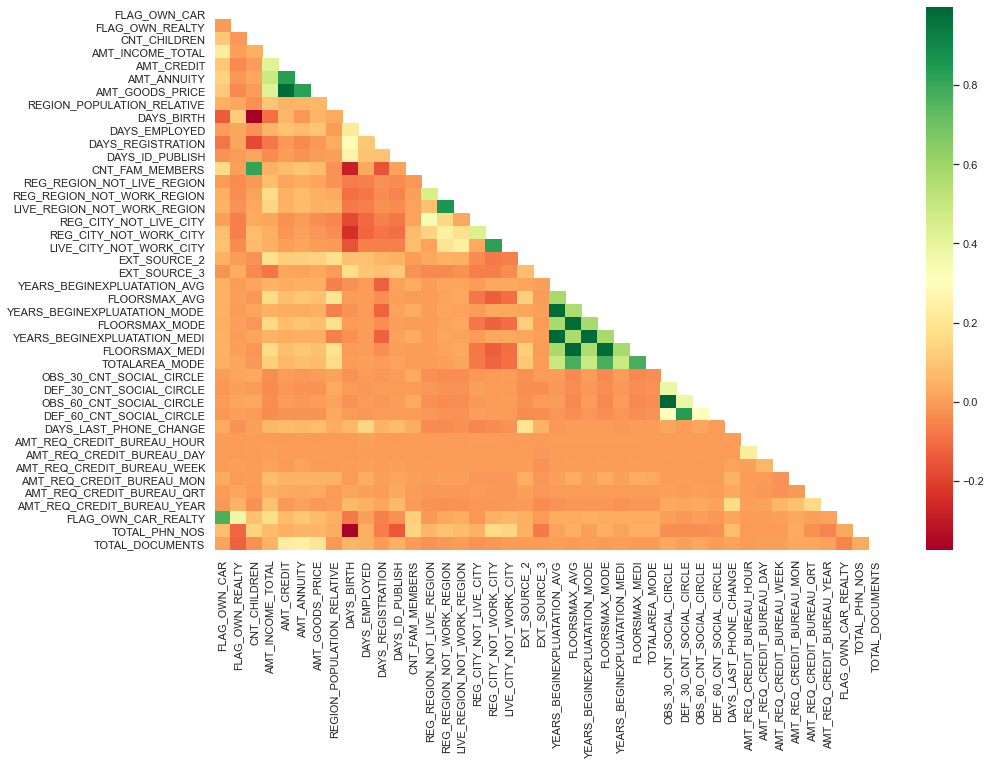

In [81]:
targets_corr(data=t0,title='Correlations in applicants who do not have payment difficulties')

## Inferences:

- **`AMT_CREDIT`** is inversely proportional to the **`DAYS_BIRTH`** , peoples belongs to low-age group taking high Credit amount and  vice-versa

- **`AMT_CREDIT`** is inversely proportional to the **`CNT_CHILDREN`**, means Credit amount is higher for less 
  children count client have and vice-versa.

- **`AMT_INCOME_TOTAL`** is inversely proportional to the **`CNT_CHILDREN`**, means more income for less children client have and vice-versa.

- less children client have in densely populated area.

- **`AMT_CREDIT`** is higher to densely populated area.

- **`AMT_INCOME_TOTAL`** is also higher in densely populated area.

### Correlations in applicants who have payment difficulties

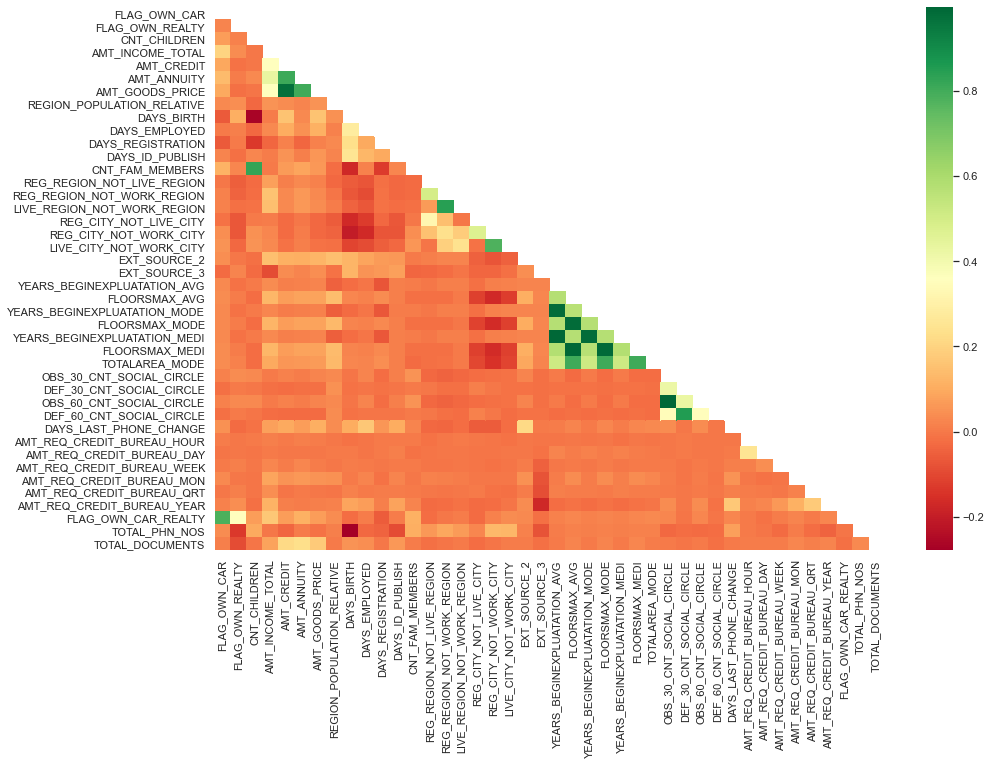

In [82]:
targets_corr(data=t1,title='Correlations in applicants who have payment difficulties')

## Inferences:

- This heat map for Target 1 is also having quite a same observation just like Target 0.


 # Top 10 Correlations for TARGET 0 and TARGET 1

In [83]:
#finding Top 10 Correlated values for defalut(1)
# finding correlation so that  there are no repeated values
corr=application_data_1.corr(method='spearman') # we will get the matrix here with all posible pair wise correlations note that this matrix is symmetric and double counts correlations
corrdf=corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))# we are removing top portion of the matrix to keep only unique pairs
corrdf=corrdf.unstack().reset_index() # we are placing one after the other as columns instead of the half triangle from the previous step
corrdf.columns=['Var1','Var2','Correlation'] #creation of column names
corrdf.dropna(subset=['Correlation'],inplace=True)
corrdf['Correlation']=round(corrdf['Correlation'],2)
corrdf['Correlation']=abs(corrdf['Correlation']) #converting -ve values to +ve because they are same as we are interested in the strength of the relationship
corrdf.sort_values(by='Correlation',ascending=False).head(10)

Var1                          Var2  Correlation
1362      OBS_60_CNT_SOCIAL_CIRCLE      OBS_30_CNT_SOCIAL_CIRCLE         1.00
1184                FLOORSMAX_MEDI                 FLOORSMAX_AVG         1.00
1140  YEARS_BEGINEXPLUATATION_MEDI   YEARS_BEGINEXPLUATATION_AVG         1.00
1142  YEARS_BEGINEXPLUATATION_MEDI  YEARS_BEGINEXPLUATATION_MODE         0.99
1186                FLOORSMAX_MEDI                FLOORSMAX_MODE         0.99
1054  YEARS_BEGINEXPLUATATION_MODE   YEARS_BEGINEXPLUATATION_AVG         0.99
1098                FLOORSMAX_MODE                 FLOORSMAX_AVG         0.98
306                AMT_GOODS_PRICE                    AMT_CREDIT         0.98
1406      DEF_60_CNT_SOCIAL_CIRCLE      DEF_30_CNT_SOCIAL_CIRCLE         0.86
703    LIVE_REGION_NOT_WORK_REGION    REG_REGION_NOT_WORK_REGION         0.85

In [84]:
#finding Top 10 Correlated values for defalut(0)
# finding correlation so that  there are no repeated values
corr=application_data_0.corr(method='spearman')
corrdf=corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
corrdf=corrdf.unstack().reset_index()
corrdf.columns=['Var1','Var2','Correlation']
corrdf.dropna(subset=['Correlation'],inplace=True)
corrdf['Correlation']=round(corrdf['Correlation'],2)
corrdf['Correlation']=abs(corrdf['Correlation']) #converting -ve values to +ve because they are same
corrdf.sort_values(by='Correlation',ascending=False).head(10)

Var1                          Var2  Correlation
1140  YEARS_BEGINEXPLUATATION_MEDI   YEARS_BEGINEXPLUATATION_AVG         1.00
1362      OBS_60_CNT_SOCIAL_CIRCLE      OBS_30_CNT_SOCIAL_CIRCLE         1.00
1184                FLOORSMAX_MEDI                 FLOORSMAX_AVG         0.99
1142  YEARS_BEGINEXPLUATATION_MEDI  YEARS_BEGINEXPLUATATION_MODE         0.99
1186                FLOORSMAX_MEDI                FLOORSMAX_MODE         0.99
1054  YEARS_BEGINEXPLUATATION_MODE   YEARS_BEGINEXPLUATATION_AVG         0.99
306                AMT_GOODS_PRICE                    AMT_CREDIT         0.98
1098                FLOORSMAX_MODE                 FLOORSMAX_AVG         0.98
703    LIVE_REGION_NOT_WORK_REGION    REG_REGION_NOT_WORK_REGION         0.86
1406      DEF_60_CNT_SOCIAL_CIRCLE      DEF_30_CNT_SOCIAL_CIRCLE         0.84

### Inferences:
- When defaulted, major portion of decision is taken by- 
(OBS_60_CNT_SOCIAL_CIRCLE-OBS_30_CNT_SOCIAL_CIRCLE)	
(AMT_GOODS_PRICE - AMT_CREDIT)
(DEF_60_CNT_SOCIAL_CIRCLE - DEF_30_CNT_SOCIAL_CIRCLE)	
- When not defaulted, major portion of decision is taken by-
(OBS_60_CNT_SOCIAL_CIRCLE	OBS_30_CNT_SOCIAL_CIRCLE)
(AMT_GOODS_PRICE - AMT_CREDIT)
(LIVE_REGION_NOT_WORK_REGION- REG_REGION_NOT_WORK_REGION)


# Insights from previous application data:

## Loading Previous Applications Data:

In [85]:
prevs_data=pd.read_csv('previous_application.csv')

In [86]:
prevs_data.shape

(1670214, 37)

In [87]:
prevs_data.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   
3           -512  Cash through the bank                XAP              NaN   
4           -781  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   D

In [88]:
prevs_data.describe()

SK_ID_PREV    SK_ID_CURR   AMT_ANNUITY  AMT_APPLICATION  \
count  1.670214e+06  1.670214e+06  1.297979e+06     1.670214e+06   
mean   1.923089e+06  2.783572e+05  1.595512e+04     1.752339e+05   
std    5.325980e+05  1.028148e+05  1.478214e+04     2.927798e+05   
min    1.000001e+06  1.000010e+05  0.000000e+00     0.000000e+00   
25%    1.461857e+06  1.893290e+05  6.321780e+03     1.872000e+04   
50%    1.923110e+06  2.787145e+05  1.125000e+04     7.104600e+04   
75%    2.384280e+06  3.675140e+05  2.065842e+04     1.803600e+05   
max    2.845382e+06  4.562550e+05  4.180581e+05     6.905160e+06   

         AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
count  1.670213e+06      7.743700e+05     1.284699e+06   
mean   1.961140e+05      6.697402e+03     2.278473e+05   
std    3.185746e+05      2.092150e+04     3.153966e+05   
min    0.000000e+00     -9.000000e-01     0.000000e+00   
25%    2.416050e+04      0.000000e+00     5.084100e+04   
50%    8.054100e+04      1.638000e+03     1.123200e+05   
75%    2.164185e+05      7.740000e+03     2.340000e+05   
max    6.905160e+06      3.060045e+06     6.905160e+06   

       HOUR_APPR_PROCESS_START  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  \
count             1.670214e+06            1.670214e+06      774370.000000   
mean              1.248418e+01            9.964675e-01           0.079637   
std               3.334028e+00            5.932963e-02           0.107823   
min               0.000000e+00            0.000000e+00          -0.000015   
25%               1.000000e+01            1.000000e+00           0.000000   
50%               1.200000e+01            1.000000e+00           0.051605   
75%               1.500000e+01            1.000000e+00           0.108909   
max               2.300000e+01            1.000000e+00           1.000000   

       RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED  DAYS_DECISION  \
count            5951.000000               5951.000000   1.670214e+06   
mean                0.188357                  0.773503  -8.806797e+02   
std                 0.087671                  0.100879   7.790997e+02   
min                 0.034781                  0.373150  -2.922000e+03   
25%                 0.160716                  0.715645  -1.300000e+03   
50%                 0.189122                  0.835095  -5.810000e+02   
75%                 0.193330                  0.852537  -2.800000e+02   
max                 1.000000                  1.000000  -1.000000e+00   

       SELLERPLACE_AREA   CNT_PAYMENT  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  \
count      1.670214e+06  1.297984e+06       997149.000000   997149.000000   
mean       3.139511e+02  1.605408e+01       342209.855039    13826.269337   
std        7.127443e+03  1.456729e+01        88916.115834    72444.869708   
min       -1.000000e+00  0.000000e+00        -2922.000000    -2892.000000   
25%       -1.000000e+00  6.000000e+00       365243.000000    -1628.000000   
50%        3.000000e+00  1.200000e+01       365243.000000     -831.000000   
75%        8.200000e+01  2.400000e+01       365243.000000     -411.000000   
max        4.000000e+06  8.400000e+01       365243.000000   365243.000000   

       DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
count              997149.000000  997149.000000     997149.000000   
mean                33767.774054   76582.403064      81992.343838   
std                106857.034789  149647.415123     153303.516729   
min                 -2801.000000   -2889.000000      -2874.000000   
25%                 -1242.000000   -1314.000000      -1270.000000   
50%                  -361.000000    -537.000000       -499.000000   
75%                   129.000000     -74.000000        -44.000000   
max                365243.000000  365243.000000     365243.000000   

       NFLAG_INSURED_ON_APPROVAL  
count              997149.000000  
mean                    0.332570  
std                     0.471134  
min                     0.000000  
25%                     0.0000

In [89]:
prevs_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

### checking of missing values percentage

In [90]:

round((100*prevs_data.isnull().sum()/len(prevs_data)).sort_values(ascending=False),2)

RATE_INTEREST_PRIVILEGED       99.64
RATE_INTEREST_PRIMARY          99.64
RATE_DOWN_PAYMENT              53.64
AMT_DOWN_PAYMENT               53.64
NAME_TYPE_SUITE                49.12
DAYS_TERMINATION               40.30
NFLAG_INSURED_ON_APPROVAL      40.30
DAYS_FIRST_DRAWING             40.30
DAYS_FIRST_DUE                 40.30
DAYS_LAST_DUE_1ST_VERSION      40.30
DAYS_LAST_DUE                  40.30
AMT_GOODS_PRICE                23.08
AMT_ANNUITY                    22.29
CNT_PAYMENT                    22.29
PRODUCT_COMBINATION             0.02
AMT_CREDIT                      0.00
SK_ID_CURR                      0.00
NAME_CONTRACT_TYPE              0.00
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
NFLAG_LAST_APPL_IN_DAY          0.00
AMT_APPLICATION                 0.00
NAME_PAYMENT_TYPE               0.00
NAME_CASH_LOAN_PURPOSE          0.00
NAME_CONTRACT_STATUS            0.00
DAYS_DECISION                   0.00
C

### Dropping the columns below as they  have missing value percentage greater than 50
#### AMT_DOWN_PAYMENT,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED 

In [91]:
prevs_data=prevs_data.drop(['AMT_DOWN_PAYMENT','RATE_DOWN_PAYMENT','RATE_INTEREST_PRIMARY','RATE_INTEREST_PRIVILEGED'], axis = 1)
prevs_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 33 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_GOODS_PRICE              1284699 non-null  float64
 7   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 8   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 9   FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 10  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 11  NAME_CASH_LOAN_PURPOSE       1670214 non-null  object 
 12  NAME_CONTRACT_STATUS         1670214 non-n

### converting -ve values to +ve

In [92]:
cols_to_convert = ['DAYS_DECISION', 'SELLERPLACE_AREA', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION','DAYS_LAST_DUE','DAYS_TERMINATION','DAYS_FIRST_DRAWING' ]
prevs_data[cols_to_convert]=prevs_data[cols_to_convert].abs()


### Checking  if there are still null values or not in the dataframe

In [93]:
round((100*prevs_data.isnull().sum()/len(prevs_data)).sort_values(ascending=False),2)

NAME_TYPE_SUITE                49.12
DAYS_FIRST_DUE                 40.30
DAYS_TERMINATION               40.30
DAYS_FIRST_DRAWING             40.30
NFLAG_INSURED_ON_APPROVAL      40.30
DAYS_LAST_DUE_1ST_VERSION      40.30
DAYS_LAST_DUE                  40.30
AMT_GOODS_PRICE                23.08
AMT_ANNUITY                    22.29
CNT_PAYMENT                    22.29
PRODUCT_COMBINATION             0.02
AMT_CREDIT                      0.00
NAME_CASH_LOAN_PURPOSE          0.00
SK_ID_CURR                      0.00
NAME_CONTRACT_TYPE              0.00
AMT_APPLICATION                 0.00
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
NFLAG_LAST_APPL_IN_DAY          0.00
DAYS_DECISION                   0.00
NAME_CONTRACT_STATUS            0.00
NAME_PAYMENT_TYPE               0.00
CODE_REJECT_REASON              0.00
NAME_CLIENT_TYPE                0.00
NAME_GOODS_CATEGORY             0.00
NAME_PORTFOLIO                  0.00
N

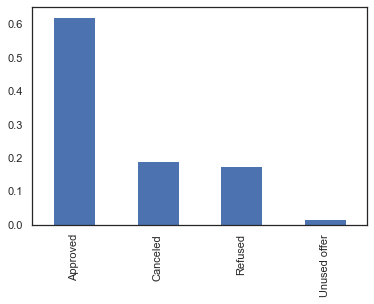

In [94]:
(prevs_data.NAME_CONTRACT_STATUS.value_counts()/len(prevs_data)).plot.bar()
plt.show()

# Merging application data and previous application data


In [95]:
apps_data1.index

Int64Index([100002, 100003, 100004, 100006, 100007, 100008, 100009, 100010,
            100011, 100012,
            ...
            456245, 456246, 456247, 456248, 456249, 456251, 456252, 456253,
            456254, 456255],
           dtype='int64', name='SK_ID_CURR', length=307059)

In [96]:
apps_data1['SK_ID_CURR'] = apps_data1.index # Converting indexcolumn to a new column in the data frame 
apps_data1.head(5)

TARGET NAME_CONTRACT_TYPE CODE_GENDER  FLAG_OWN_CAR  \
SK_ID_CURR                                                        
100002           1         Cash loans           M             0   
100003           0         Cash loans           F             0   
100004           0    Revolving loans           M             1   
100006           0         Cash loans           F             0   
100007           0         Cash loans           M             0   

            FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
SK_ID_CURR                                                                
100002                    1             0          202500.0    406597.5   
100003                    0             0          270000.0   1293502.5   
100004                    1             0           67500.0    135000.0   
100006                    1             0          135000.0    312682.5   
100007                    1             0          121500.0    513000.0   

            AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
SK_ID_CURR                                                                  
100002          24700.5         351000.0   Unaccompanied          Working   
100003          35698.5        1129500.0          Family    State servant   
100004           6750.0         135000.0   Unaccompanied          Working   
100006          29686.5         297000.0   Unaccompanied          Working   
100007          21865.5         513000.0   Unaccompanied          Working   

                      NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
SK_ID_CURR                                                        
100002      Secondary / secondary special  Single / not married   
100003                   Higher education               Married   
100004      Secondary / secondary special  Single / not married   
100006      Secondary / secondary special        Civil marriage   
100007      Secondary / secondary special  Single / not married   

            NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
SK_ID_CURR                                                              
100002      House / apartment                    0.018801          25   
100003      House / apartment                    0.003541          45   
100004      House / apartment                    0.010032          52   
100006      House / apartment                    0.008019          52   
100007      House / apartment                    0.028663          54   

            DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH OCCUPATION_TYPE  \
SK_ID_CURR                                                                      
100002                 21                121               70        Laborers   
100003                 39                 39                9      Core staff   
100004                  7                142               84        Laborers   
100006                101                327               81        Laborers   
100007                101                143              115      Core staff   

            CNT_FAM_MEMBERS  REG_REGION_NOT_LIVE_REGION  \
SK_ID_CURR                                                
100002                    1                           0   
100003                    2                           0   
100004                    1                           0   
100006                    2                           0   
100007                    1                           0   

            REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
SK_ID_CURR                                                            
100002                               0                            0   
100003                               0                            0   
100004                               0                            0   
100006                               0                            0   
100007                               0                            0   

            RE

In [97]:
# making a left join because we need all the rows and columns in application data 
# by making this left join we get historical application data for each applicant.
# if we made a inner join we would loose the data of a new customer who doesn't have a previous record.
# while we are doing left merging with the base data set, If we have the multiple similar key with different values in merging data set 
#then it will create a copies of same key with all those different values after merging with the base data set.  
# with this in mind we are moving forward.
apps_data1.reset_index(drop=True, inplace=True)
merged_df=pd.merge(apps_data1,prevs_data,how='left',on='SK_ID_CURR',suffixes=('_Current', '_Previous'))
merged_df.head()

TARGET NAME_CONTRACT_TYPE_Current CODE_GENDER  FLAG_OWN_CAR  \
0       1                 Cash loans           M             0   
1       0                 Cash loans           F             0   
2       0                 Cash loans           F             0   
3       0                 Cash loans           F             0   
4       0            Revolving loans           M             1   

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_Current  \
0                1             0          202500.0            406597.5   
1                0             0          270000.0           1293502.5   
2                0             0          270000.0           1293502.5   
3                0             0          270000.0           1293502.5   
4                1             0           67500.0            135000.0   

   AMT_ANNUITY_Current  AMT_GOODS_PRICE_Current NAME_TYPE_SUITE_Current  \
0              24700.5                 351000.0           Unaccompanied   
1              35698.5                1129500.0                  Family   
2              35698.5                1129500.0                  Family   
3              35698.5                1129500.0                  Family   
4               6750.0                 135000.0           Unaccompanied   

  NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
0          Working  Secondary / secondary special  Single / not married   
1    State servant               Higher education               Married   
2    State servant               Higher education               Married   
3    State servant               Higher education               Married   
4          Working  Secondary / secondary special  Single / not married   

   NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
0  House / apartment                    0.018801          25             21   
1  House / apartment                    0.003541          45             39   
2  House / apartment                    0.003541          45             39   
3  House / apartment                    0.003541          45             39   
4  House / apartment                    0.010032          52              7   

   DAYS_REGISTRATION  DAYS_ID_PUBLISH OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                121               70        Laborers                1   
1                 39                9      Core staff                2   
2                 39                9      Core staff                2   
3                 39                9      Core staff                2   
4                142               84        Laborers                1   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
0                            0                       0   
1                            0                       0   
2                            0                       0   
3                            0                       0   
4                            0                       0   

   REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  \
0                       0                        0  Business Entity Type 3   
1                       0                        0                  School   
2                       0                        0                  School   
3                       0                        0                  School   
4                       0                        0              Government   

   EXT_SOURCE_2  EXT_SOURCE_3  YEARS_BEGINEXPLUATATION_AVG  FLOORSMAX_AVG  \
0      0.262949      0.139376                       0.9722         0.0833   


## Univariate Analysis

### Categorical analysis

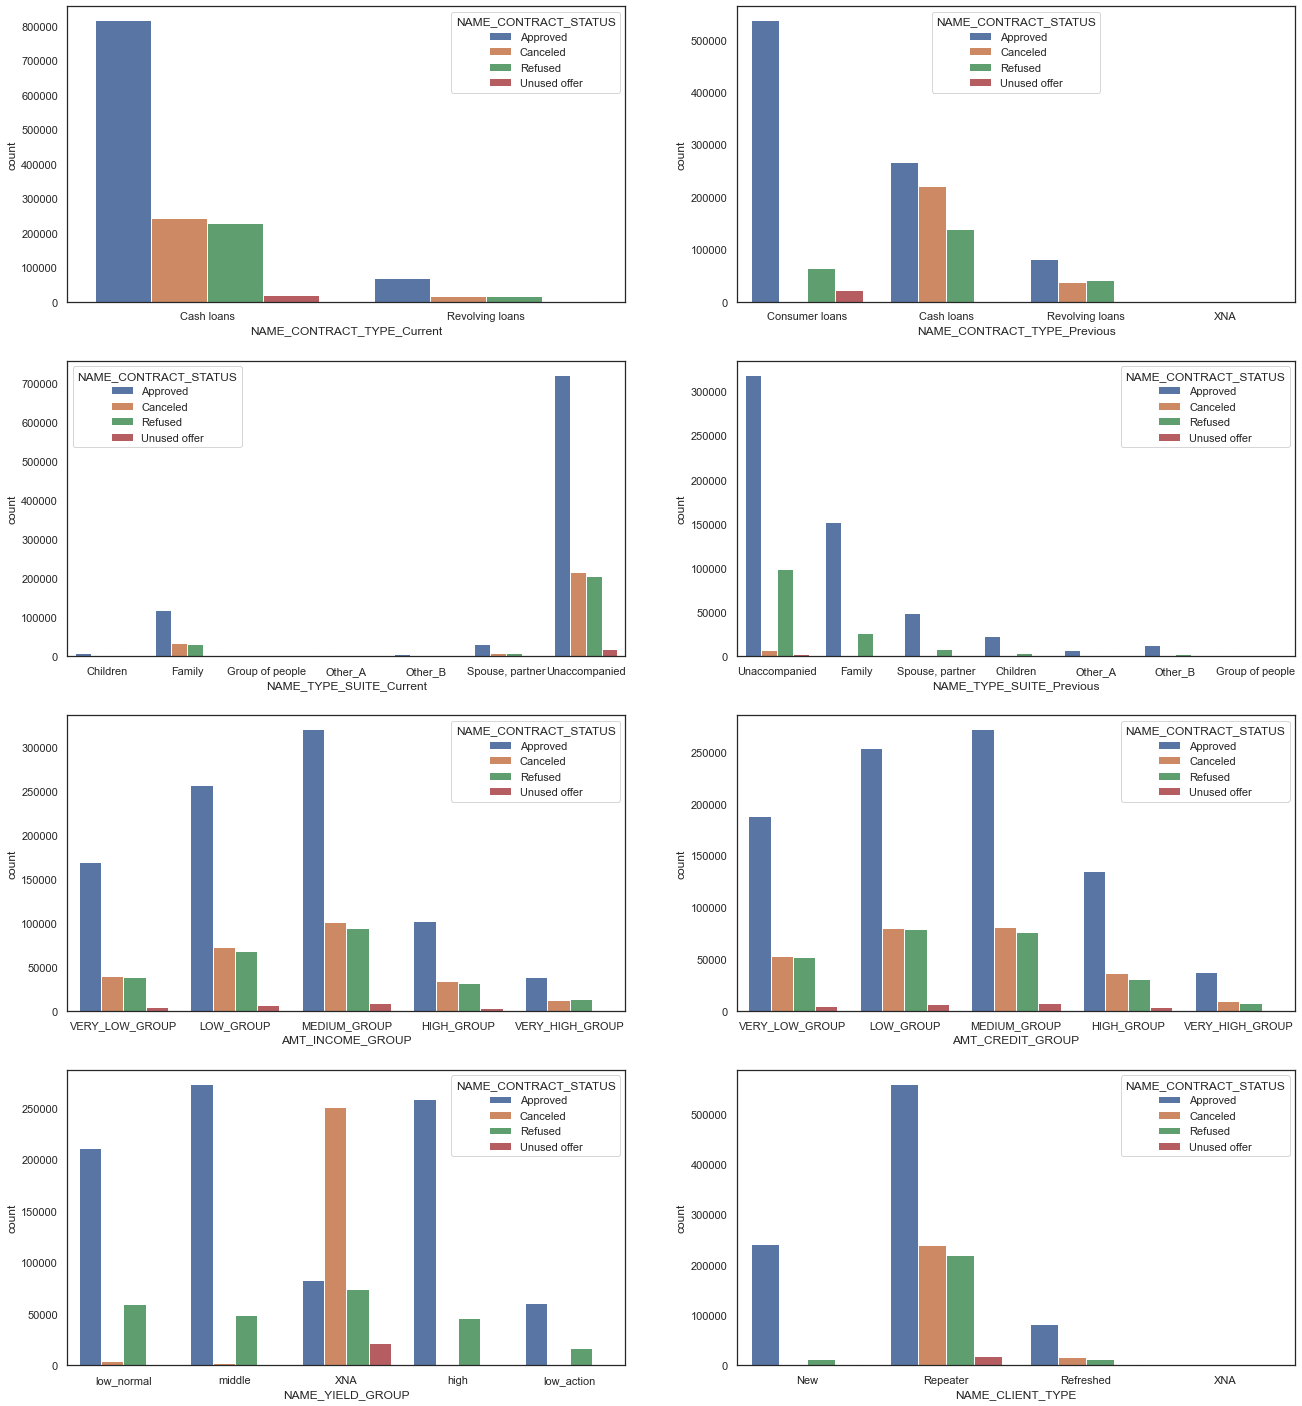

In [98]:
# Univariate Categorical analysis
cat_cols=['NAME_CONTRACT_TYPE_Current','NAME_CONTRACT_TYPE_Previous',
                     'NAME_TYPE_SUITE_Current','NAME_TYPE_SUITE_Previous',
                    'AMT_INCOME_GROUP','AMT_CREDIT_GROUP','NAME_YIELD_GROUP','NAME_CLIENT_TYPE']


plt.figure(figsize=(22,25))
for i in (enumerate(cat_cols)):
    plt.subplot(len(cat_cols)//2,2,i[0]+1)
    sns.countplot(x=i[1],hue='NAME_CONTRACT_STATUS',data=merged_df)
    #lt.yscale('log')
    #plt.xticks(rotation=90)
plt.show()

### Inferences:
- Repeater has highest number of approved loans as well as cancelled loans.
- Middle NAME_YIELD_GROUP has highest approval, followed by high and followed by low_normal.
- Value of AMT_CREDIT_GROUP does very low affect on loan approvals.
- For Medium_group AMT_INCOME_GROUP the approval is highest, followed by LOW_GROUP .
- Both in NAME_TYPE_SUITE_Previous and NAME_TYPE_SUITE_Current unaccompanied has the highest proportion when compared with other groups.
- Currently bank is only giving two types of loans -Cash and Revolving Loans, but previously bank was providing Cash, Revolving and Consumer loans.
- Consumer loans were highest previously and now Cash loans are higher.

### Continous/Numerical analysis

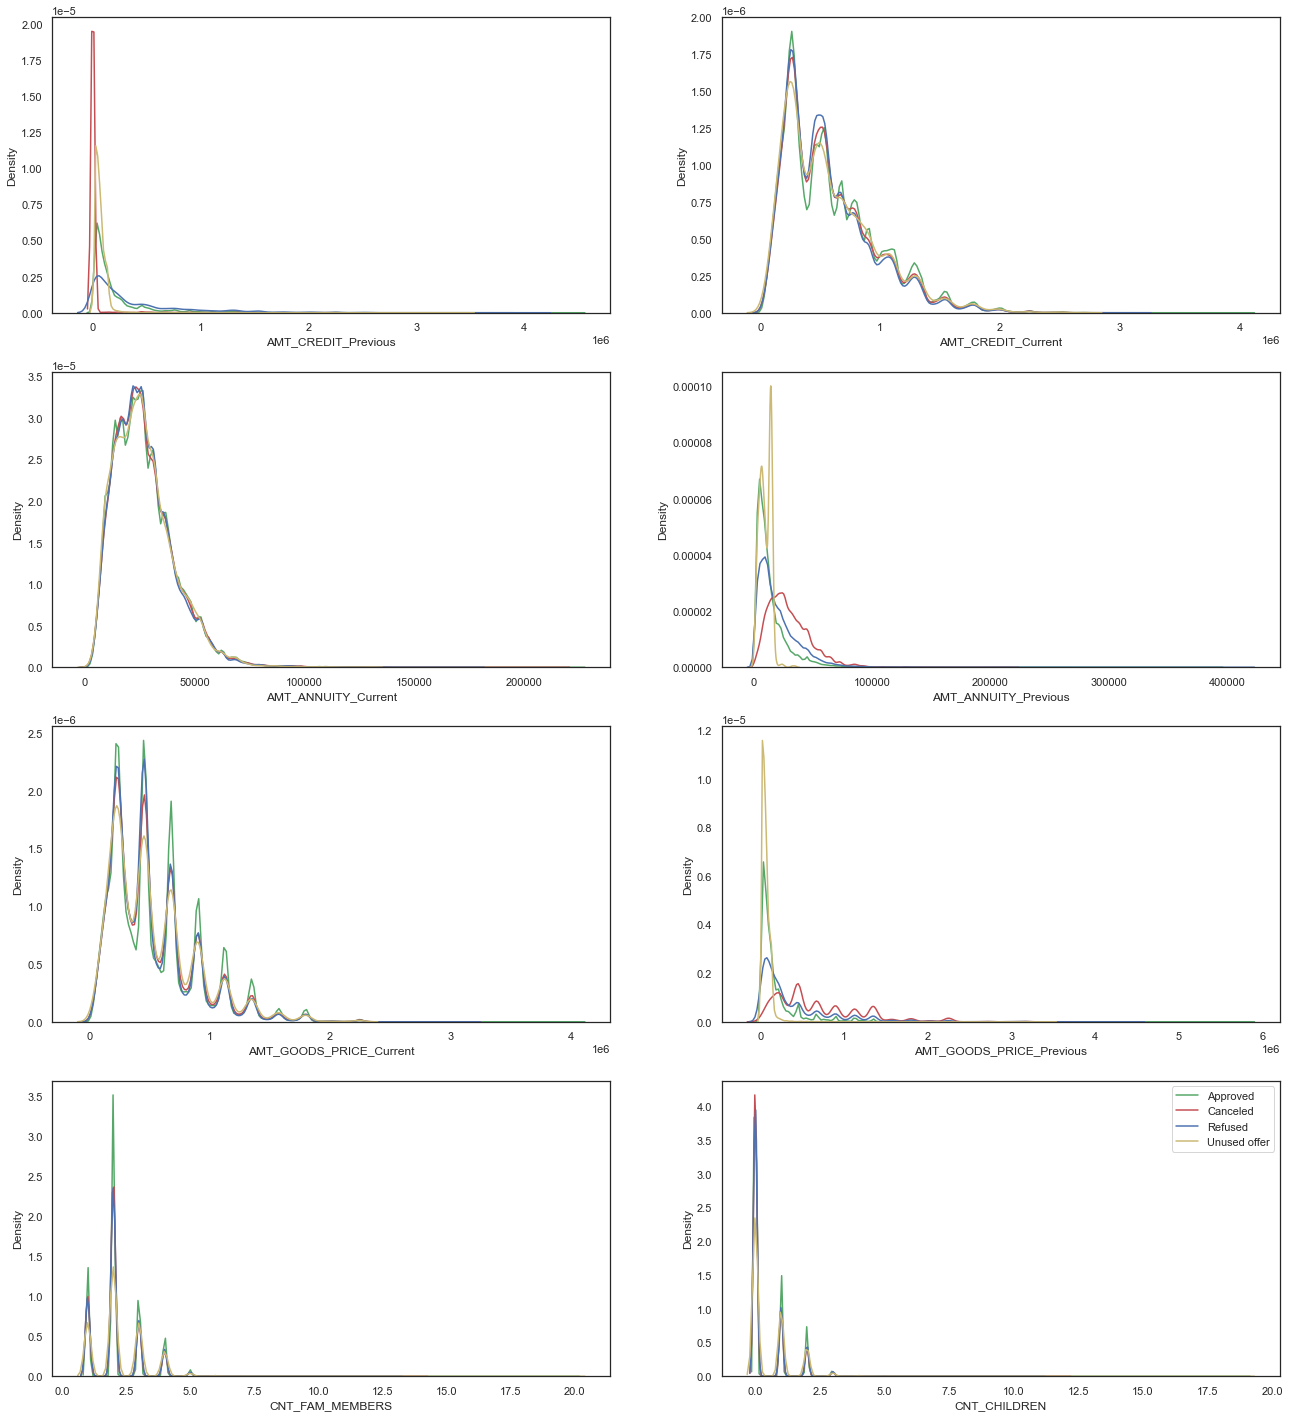

In [99]:
# Univariate Numerical analysis
continous_columns=['AMT_CREDIT_Previous','AMT_CREDIT_Current','AMT_ANNUITY_Current','AMT_ANNUITY_Previous',
                   'AMT_GOODS_PRICE_Current','AMT_GOODS_PRICE_Previous','CNT_FAM_MEMBERS','CNT_CHILDREN']
plt.figure(figsize=(22,25))
for i in (enumerate(continous_columns)):
    plt.subplot(len(continous_columns)//2,2,i[0]+1)
    sns.distplot(merged_df.loc[merged_df.NAME_CONTRACT_STATUS=='Approved',:][i[1]].dropna(),hist=False,label='Approved',color="g")
    sns.distplot(merged_df.loc[merged_df.NAME_CONTRACT_STATUS=='Canceled',:][i[1]].dropna(),hist=False,label='Canceled',kde_kws={'bw':0.1},color="r")
    sns.distplot(merged_df.loc[merged_df.NAME_CONTRACT_STATUS=='Refused',:][i[1]].dropna(),hist=False,label='Refused',kde_kws={'bw':0.1},color="b")
    # we added kde_kws={'bw':0.1} in parameter to overcome bandwidth limitation.
    sns.distplot(merged_df.loc[merged_df.NAME_CONTRACT_STATUS=='Unused offer',:][i[1]].dropna(),hist=False,label='Unused offer',color="y")
plt.legend()
plt.show() 

### Inferences:
- Families who have two members in them tends to take more loans.
- Previously bank had applicants with high unused offers but currently applicants with Approved is high w.r.t AMT_GOODS_PRICE.
- Previously bank had applicants with high unused offers but currently all the groups are similar w.r.t AMT_ANNUITY.
- Previously bank had applicants with high Rejected offers but currently high number of Approved offers w.r.t AMT_CREDIT.

## Bi-variate Analysis

### Bi-variate analysis for Categorical columns

NAME_CONTRACT_TYPE_Current  Cash loans  Revolving loans
NAME_CONTRACT_STATUS                                   
Approved                        815983            69474
Canceled                        241294            17866
Refused                         228232            17029
Unused offer                     20630             2130


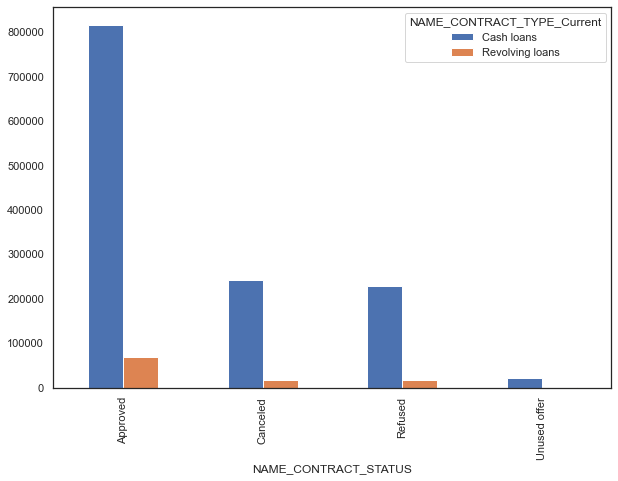

In [100]:
bivar_1= pd.crosstab(index=merged_df['NAME_CONTRACT_STATUS'],columns=merged_df['NAME_CONTRACT_TYPE_Current'])
print(bivar_1)
bivar_1.plot(kind="bar", figsize=(10,7),stacked=False)
plt.show()
#Cash loans have the highest count of Approved loans

NAME_INCOME_TYPE      Commercial associate  Maternity leave  Pensioner  \
NAME_CONTRACT_STATUS                                                     
Approved                            198298               10     170041   
Canceled                             59678                2      57606   
Refused                              58059                3      43783   
Unused offer                          5070                1       1924   

NAME_INCOME_TYPE      State servant  Student  Unemployed  Working  
NAME_CONTRACT_STATUS                                               
Approved                      61591       20          68   455429  
Canceled                      15663        3          16   126192  
Refused                       15591        1          38   127786  
Unused offer                   1516        0           1    14248  


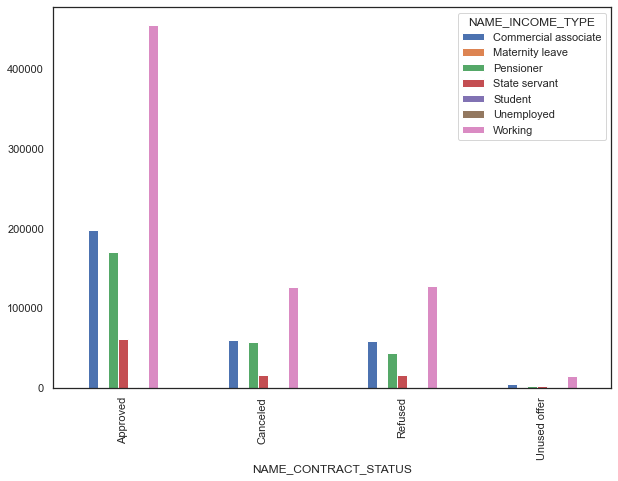

In [101]:
bivar_2= pd.crosstab(index=merged_df['NAME_CONTRACT_STATUS'],columns=merged_df['NAME_INCOME_TYPE'])
print(bivar_2)
bivar_2.plot(kind="bar", figsize=(10,7),stacked=False)
plt.show()
# Highest number of approvals for working applicant

NAME_EDUCATION_TYPE   Academic degree  Higher education  Incomplete higher  \
NAME_CONTRACT_STATUS                                                         
Approved                          418            194788              27659   
Canceled                           64             56983               7907   
Refused                            91             53988               8633   
Unused offer                        6              6714                983   

NAME_EDUCATION_TYPE   Lower secondary  Secondary / secondary special  
NAME_CONTRACT_STATUS                                                  
Approved                        10924                         651668  
Canceled                         3096                         191110  
Refused                          2971                         179578  
Unused offer                      165                          14892  


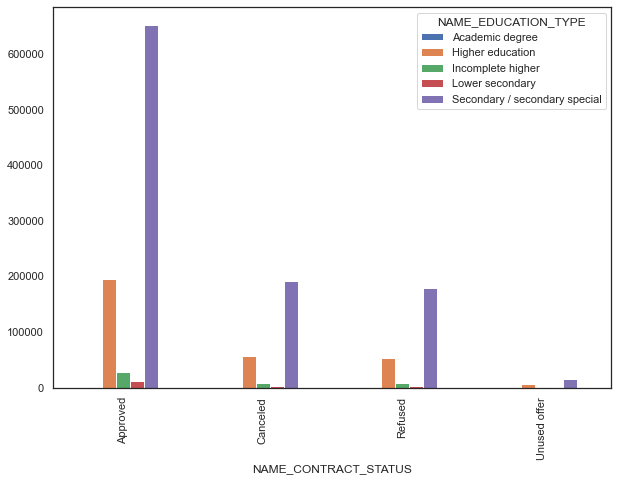

In [102]:
bivar_3= pd.crosstab(index=merged_df['NAME_CONTRACT_STATUS'],columns=merged_df['NAME_EDUCATION_TYPE'])
print(bivar_3)
bivar_3.plot(kind="bar", figsize=(10,7),stacked=False)
plt.show()
# Highest number of approvals for Secondary/secondary special educated applicant

NAME_FAMILY_STATUS    Civil marriage  Married  Separated  \
NAME_CONTRACT_STATUS                                       
Approved                       86787   576678      56699   
Canceled                       26131   167021      16516   
Refused                        28214   152078      16443   
Unused offer                    1960    14366       1599   

NAME_FAMILY_STATUS    Single / not married  Widow  
NAME_CONTRACT_STATUS                               
Approved                            114814  50479  
Canceled                             33372  16120  
Refused                              34279  14247  
Unused offer                          4080    755  


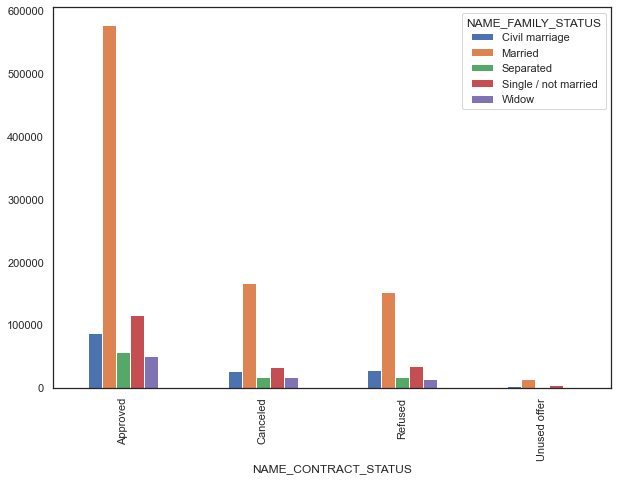

In [103]:
bivar_4= pd.crosstab(index=merged_df['NAME_CONTRACT_STATUS'],columns=merged_df['NAME_FAMILY_STATUS'])
print(bivar_4)
bivar_4.plot(kind="bar", figsize=(10,7),stacked=False)
plt.show()
# Highest number of approvals for Married applicant

NAME_HOUSING_TYPE     Co-op apartment  House / apartment  Municipal apartment  \
NAME_CONTRACT_STATUS                                                            
Approved                         2786             791077                33102   
Canceled                          629             233856                 9139   
Refused                           659             219183                 8537   
Unused offer                      313              19853                  702   

NAME_HOUSING_TYPE     Office apartment  Rented apartment  With parents  
NAME_CONTRACT_STATUS                                                    
Approved                          7318             12608         38566  
Canceled                          1926              3385         10225  
Refused                           2005              3514         11363  
Unused offer                       178               278          1436  


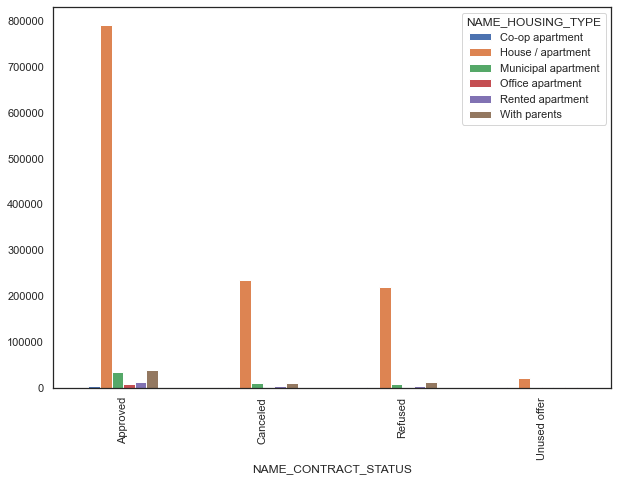

In [104]:
bivar_5= pd.crosstab(index=merged_df['NAME_CONTRACT_STATUS'],columns=merged_df['NAME_HOUSING_TYPE'])
print(bivar_5)
bivar_5.plot(kind="bar", figsize=(10,7),stacked=False)
plt.show()
# Highest number of approvals for House/apartment owner.

NAME_CONTRACT_TYPE_Previous  Cash loans  Consumer loans  Revolving loans  XNA
NAME_CONTRACT_STATUS                                                         
Approved                         266119          536996            82342    0
Canceled                         220150            1326            37400  284
Refused                          139501           64256            41475   29
Unused offer                        432           22324                4    0


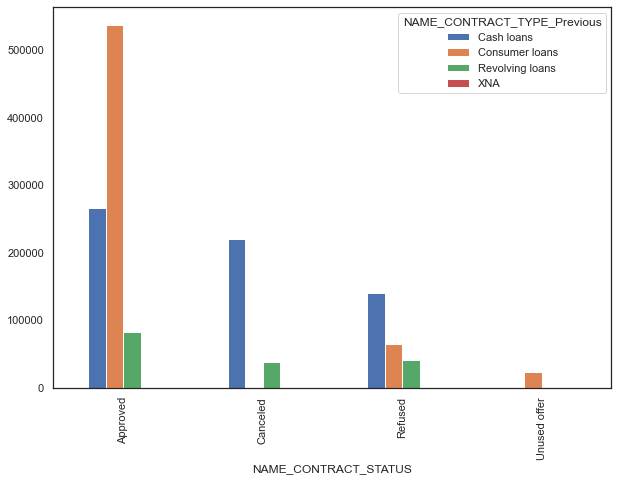

In [105]:
bivar_6= pd.crosstab(index=merged_df['NAME_CONTRACT_STATUS'],columns=merged_df['NAME_CONTRACT_TYPE_Previous'])
print(bivar_6)
bivar_6.plot(kind="bar", figsize=(10,7),stacked=False)
plt.show()
# Highest number of approvals for Consumer Loans.

NAME_CLIENT_TYPE         New  Refreshed  Repeater  XNA
NAME_CONTRACT_STATUS                                  
Approved              242331      82655    560037  434
Canceled                2918      16062    239382  798
Refused                12353      12512    220120  276
Unused offer            1867       3399     17466   28


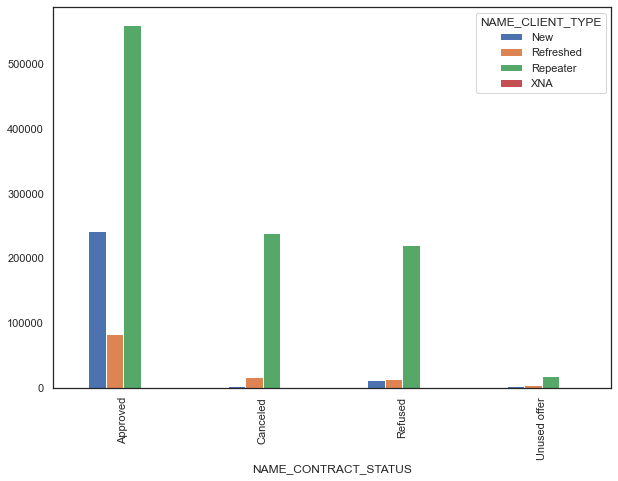

In [106]:
bivar_7= pd.crosstab(index=merged_df['NAME_CONTRACT_STATUS'],columns=merged_df['NAME_CLIENT_TYPE'])
print(bivar_7)
bivar_7.plot(kind="bar", figsize=(10,7),stacked=False)
plt.show()
# repeated applications got approved most number of times

## Bivariate Continous/Numerical analysis

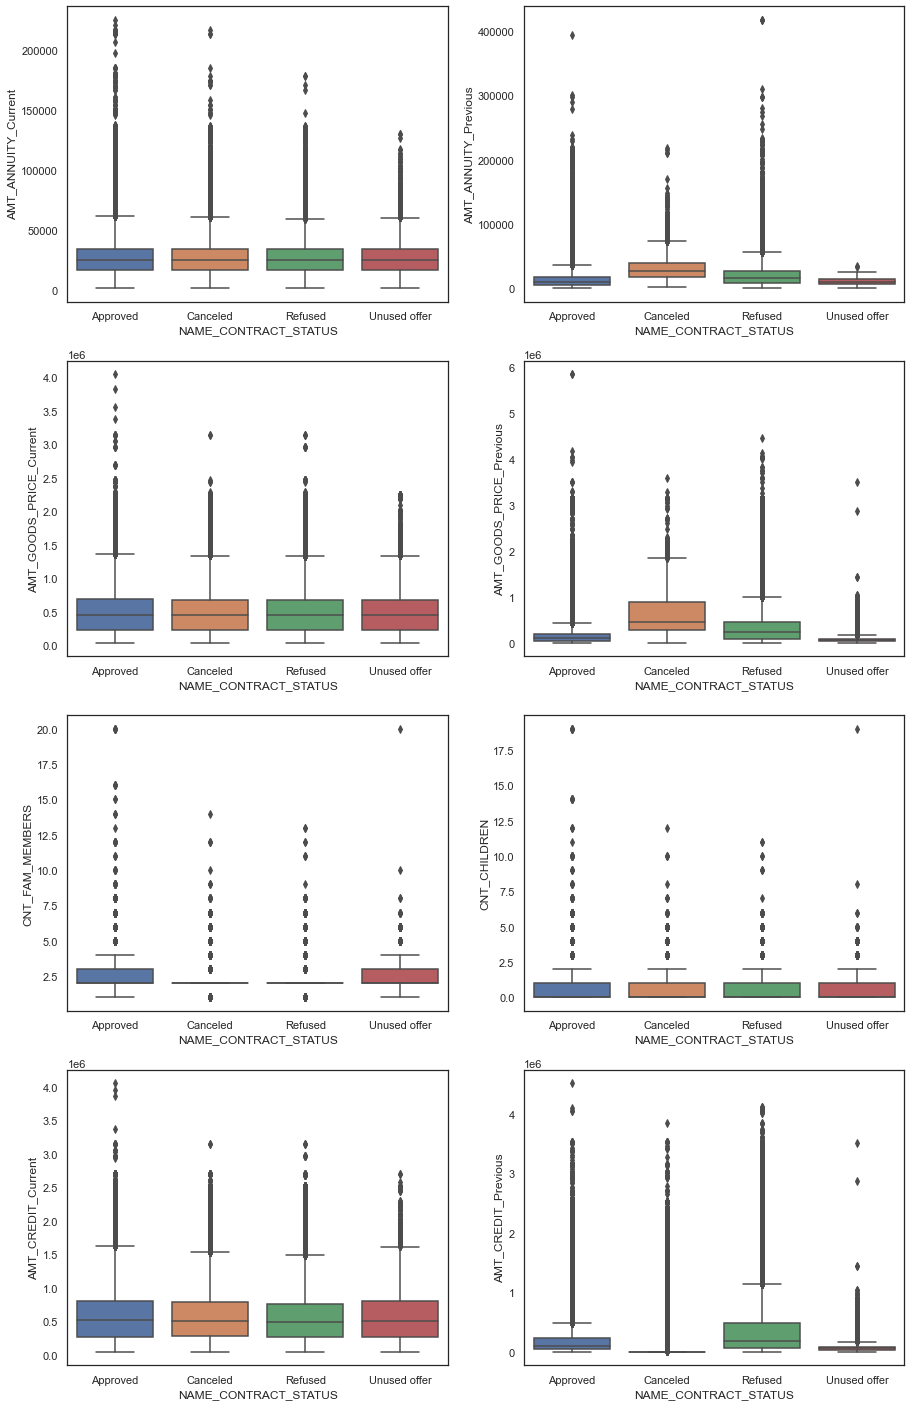

In [107]:
#Bi-variate continous plots
continous_columns=['AMT_ANNUITY_Current','AMT_ANNUITY_Previous',
                   'AMT_GOODS_PRICE_Current','AMT_GOODS_PRICE_Previous','CNT_FAM_MEMBERS','CNT_CHILDREN',
                   'AMT_CREDIT_Current','AMT_CREDIT_Previous']
plt.figure(figsize=(15,25))
for i in (enumerate(continous_columns)):
    plt.subplot(len(continous_columns)//2,2,i[0]+1)
    sns.boxplot(x='NAME_CONTRACT_STATUS',y=merged_df[i[1]].dropna(),data=merged_df)
plt.show() 

### Inferences:

- AMT_CREDIT_Previous has highest refused cases and AMT_CREDIT_Current have a similar distribution for all 4 cases.
- Family with 2-3 people are the majority group in the approved and unused categories.
- Previously most of the applications were cancelled or refused but now Refused/Cancelled/Approved/Unused all have similar distribution w.r.t AMT_GOODS_PRICE and AMT_ANNUITY.
